In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data and first look at the data 
pharma_data = pd.read_csv('PharmaDrugSales_1.csv')
pharma_data.head()

,Month,Sales
0,7/1/1991,3.526591
1,8/1/1991,3.180891
2,9/1/1991,3.252221
3,10/1/1991,3.611003
4,11/1/1991,3.565869


In [3]:
pharma_data.dtypes

Month     object
Sales    float64
dtype: object

In [4]:
def convert_to_datetime(date_str):
    return pd.to_datetime(date_str, format='%m/%d/%Y')

In [5]:
pharma_data['Month'] = pharma_data['Month'].apply(convert_to_datetime)
pharma_data.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [6]:
pharma_data.head()

,Month,Sales
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


# Question 1
# 1)

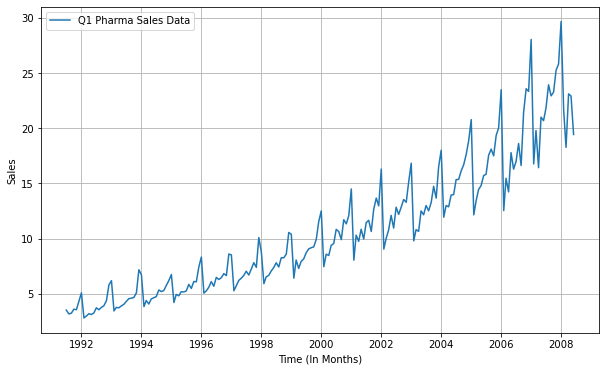

In [7]:
# PART 1:
# Plotting the original time series data of sales
plt.figure(figsize=(10,6))
plt.plot(pharma_data['Month'], pharma_data['Sales'], label='Q1 Pharma Sales Data')
plt.xlabel('Time (In Months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 2)

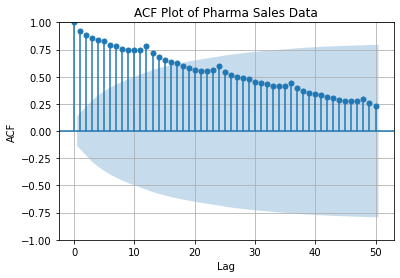

In [8]:
# PART 2:
# Plotting the ACF and finding the seasonal period from the plot
plot_acf(pharma_data['Sales'], lags=50)
plt.title('ACF Plot of Pharma Sales Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

We can see from the ACF plot that the ACF is slowly decaying and much of the lags are significant which confirms that the time series of we're working with is non-stationary. This can also be seen from the plot of the data, there is a clear trend and seasonal component to it so Sales data is non-stationary. From the ACF plot, the seasonality seems to be annual, so, seasonal period = 12 months.

# 3)

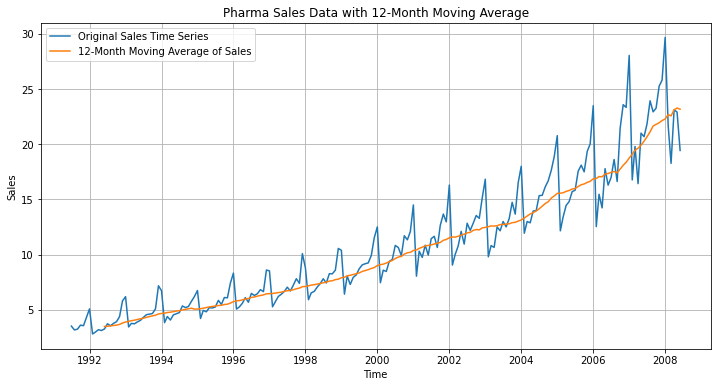

In [9]:
# PART 3:
# Computing moving average of the data to determine the trend and overlaying with original data
window_len = 12

# Calculating 12 month moving average using rolling mean
pharma_data['Moving Average'] = pharma_data['Sales'].rolling(window=window_len).mean()

# Plotting the original sales data and the 12-month moving average data
plt.figure(figsize=(12,6))
plt.plot(pharma_data['Month'], pharma_data['Sales'], label='Original Sales Time Series')
plt.plot(pharma_data['Month'], pharma_data['Moving Average'], label=f'12-Month Moving Average of Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Pharma Sales Data with 12-Month Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# 4)
From observing the moving average plot above we can say that the trend seems to be increasing.

# 5A)

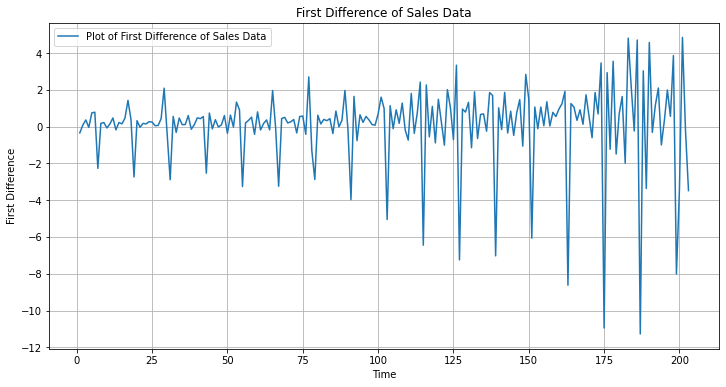

In [10]:
# PART 5 A:
# Computing the first difference of the data and plotting the ACF and PACF of the differenced data
differenced_data = pharma_data['Sales'].diff(1).dropna()

# Plotting the First Difference of Sales Data for visual inspection of data
plt.figure(figsize=(12,6))
plt.plot(differenced_data, label='Plot of First Difference of Sales Data')
plt.xlabel('Time')
plt.ylabel('First Difference')
plt.title('First Difference of Sales Data')
plt.legend()
plt.grid(True)
plt.show()

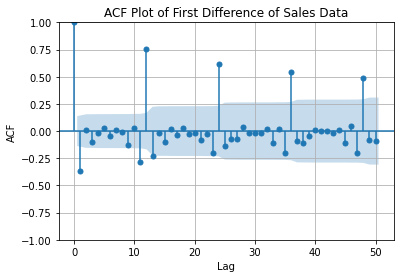

<Figure size 720x432 with 0 Axes>

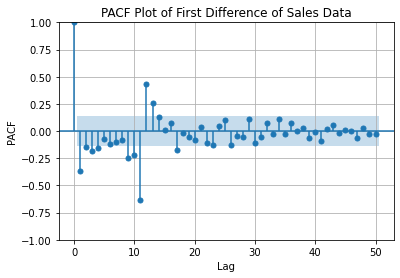

In [11]:
# Plotting the ACF and PACF of the First Differenced Data

# ACF
plot_acf(differenced_data, lags=50, alpha=0.05)
plt.title('ACF Plot of First Difference of Sales Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

#PACF
plt.figure(figsize=(10,6))
plot_pacf(differenced_data, lags=50, method='ywm')
plt.title('PACF Plot of First Difference of Sales Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

# 5B)
In Q2 the ACF plot is slowly decaying and is significant at many lags which is a sign of the non-stationarity of the data, suggesting underlying trend or seasonality which can be seen to be present from the time series plot of the data. When we apply differencing on the data and plot it, we can see that the mean and variance seem to be constant, the differencing process helps remove the trend and seasonality. The ACF and PACF plots of the first difference of the sales data follow of decaying sinusoidal pattern which indicates the presence of seasonality and from the ACF plot we can make the seasonality to be annual i.e. seasonality period = 12 months. So after applying the first difference we removed the trend in the data but seasonality is still present.

# 6)

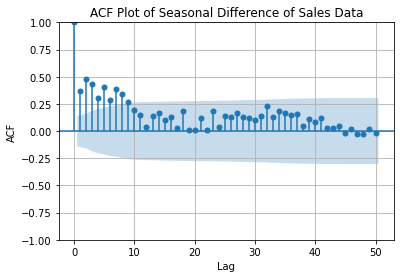

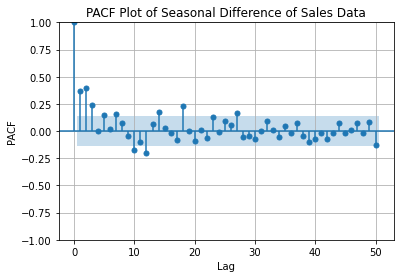

In [12]:
# PART 6:
# Performing seasonal differencing
seasonal_differenced_data = pharma_data['Sales'].diff(12).dropna()

# ACF of seasonal differenced sales 
plot_acf(seasonal_differenced_data, lags=50, alpha=0.05)
plt.title('ACF Plot of Seasonal Difference of Sales Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# PACF
plot_pacf(seasonal_differenced_data, lags=50, method='ywm')
plt.title('PACF Plot of Seasonal Difference of Sales Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [13]:
# TESTING CELL TO LOOK AT THE INDEX OF 2005-06-01 ROW
# Filtering the DataFrame for rows where 'Month' is '2005-06-01'
desired_row = pharma_data[pharma_data['Month'] == '2005-06-01']
index_of_desired_row = desired_row.index[0]
print(index_of_desired_row)

167


# 7)

In [14]:
# PART 7:
# Finding the Best SARIMA Model 
# Specifying range of p, d and q
p_vals = range(4)
d = 1
q_vals = range(4)
P_VALUES = range(4)
D = 1
Q_VALUES = range(4)
s = 12 # Seasonal period

best_aic = np.inf
best_params = None

trainset = pharma_data[0 : 168] # Data until June 2005 as we found June 2005 index to be 167

# Grid search to find the best SARIMA model
for p in p_vals:
    for q in q_vals:
        for P in P_VALUES:
            for Q in Q_VALUES:

                try:
                    model = sm.tsa.SARIMAX(trainset['Sales'],  
                                          order=(p, d, q),
                                          seasonal_order=(P, D, Q, s),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
                                         
                    results = model.fit()
                    aic = results.aic
                    print(aic)
                    if aic < best_aic:
                        best_aic = aic
                        best_params = (p, d, q, P, D, Q)
                except:
                    continue

# Fitting the best SARIMA model with the identified parameters
best_model = sm.tsa.SARIMAX(pharma_data['Sales'][ : 168],  # Data until June 2005
                            order=(best_params[0], best_params[1], best_params[2]),
                            seasonal_order=(best_params[3], best_params[4], best_params[5], s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
best_results = best_model.fit()

# Displaying the best model parameters and summary
print(f"Best SARIMA Model: SARIMA{best_params} (seasonal period = 12)")
print(best_results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05590D+00    |proj g|=  1.13418D-01

At iterate    5    f=  1.05413D+00    |proj g|=  4.79039D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      7      1     0     0   4.790D-07   1.054D+00
  F =   1.0541290038753439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


356.18734530211555
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88064D-01    |proj g|=  1.27866D-01

At iterate    5    f=  9.83434D-01    |proj g|=  1.57418D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   2.114D-06   9.834D-01
  F =  0.98343387036150409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
334.4337804414654
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3   

 This problem is unconstrained.



At iterate   10    f=  8.41735D-01    |proj g|=  5.62546D-03

At iterate   15    f=  8.41721D-01    |proj g|=  2.78529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   2.193D-06   8.417D-01
  F =  0.84172134761467476     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
290.81837279853073
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.96804D-01    |proj g|=  1.35725D-05


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.448D-05   9.968D-01
  F =  0.99680398705586859     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
338.92613965077186
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89721D-01    |proj g|=  1.24227D-01

At iterate    5    f=  9.80468D-01    |proj g|=  8.05536D-02

At iterate   10    f=  9.78750D-01    |proj g|=  2.02227D-06

           * * *

Tit   = total number of iteratio

 This problem is unconstrained.



At iterate    5    f=  8.44257D-01    |proj g|=  3.85457D-02

At iterate   10    f=  8.42476D-01    |proj g|=  6.34295D-03

At iterate   15    f=  8.41092D-01    |proj g|=  1.47751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   5.012D-06   8.411D-01
  F =  0.84109021131971651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
292.60631100342476
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.13735D-01    |proj g|=  1

 This problem is unconstrained.
 This problem is unconstrained.


313.01504678723103
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14152D-01    |proj g|=  6.29700D-02

At iterate    5    f=  9.12533D-01    |proj g|=  7.51846D-03

At iterate   10    f=  9.12091D-01    |proj g|=  9.28188D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   9.282D-06   9.121D-01
  F =  0.91209094334288887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
314.46255696321066
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.



At iterate    5    f=  9.07174D-01    |proj g|=  2.74877D-02

At iterate   10    f=  9.05712D-01    |proj g|=  4.59025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     18      1     0     0   7.568D-06   9.057D-01
  F =  0.90565344930868952     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
314.2995589677197


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17814D+00    |proj g|=  6.50785D-01

At iterate    5    f=  8.43670D-01    |proj g|=  5.28640D-02

At iterate   10    f=  8.37323D-01    |proj g|=  1.47477D-02

At iterate   15    f=  8.34759D-01    |proj g|=  5.22156D-02

At iterate   20    f=  8.27582D-01    |proj g|=  8.25568D-02

At iterate   25    f=  8.18597D-01    |proj g|=  5.72696D-03

At iterate   30    f=  8.18551D-01    |proj g|=  1.28837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     18      1     0     0   1.196D-05   8.435D-01
  F =  0.84348280956592836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
291.41022401415194
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43616D-01    |proj g|=  1.52437D-02

At iterate    5    f=  8.43415D-01    |proj g|=  7.17248D-04

At iterate   10    f=  8.43413D-01    |proj g|=  1.92698D-06

           * * *

Tit   = total number of iteratio

 This problem is unconstrained.



At iterate    5    f=  8.44466D-01    |proj g|=  1.40390D-02

At iterate   10    f=  8.43581D-01    |proj g|=  7.74130D-03

At iterate   15    f=  8.43384D-01    |proj g|=  1.37885D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     20      1     0     0   3.633D-06   8.434D-01
  F =  0.84338413007631652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
295.37706770564233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12996D+00    |proj g|=  5

 This problem is unconstrained.



At iterate    5    f=  8.37087D-01    |proj g|=  3.54428D-02

At iterate   10    f=  8.29013D-01    |proj g|=  2.29499D-02

At iterate   15    f=  8.28539D-01    |proj g|=  1.71291D-03

At iterate   20    f=  8.28516D-01    |proj g|=  3.34127D-03

At iterate   25    f=  8.28496D-01    |proj g|=  3.94142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   1.152D-05   8.285D-01
  F =  0.82849592339092648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
292.3746302593513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.10406D-01    |proj g|=  4.36525D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   6.555D-06   7.104D-01
  F =  0.71038670940110238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
246.68993435877042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62157D-01    |proj g|=  2.83905D-01


 This problem is unconstrained.



At iterate    5    f=  6.62167D-01    |proj g|=  2.52605D-02

At iterate   10    f=  6.59498D-01    |proj g|=  4.23839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   1.494D-06   6.595D-01
  F =  0.65949817977189351     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
231.5913884033562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.78040D-01    |proj g|=  1.15379D-01

At iterate    5    f=  7.70057D-01    |proj g|=  3.

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.50046D-01    |proj g|=  1.05148D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     35      1     0     0   1.541D-02   7.499D-01
  F =  0.74985403097174963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
259.9509544065079
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52526D-01    |proj g|=  2.39706D-01


 This problem is unconstrained.



At iterate    5    f=  7.09512D-01    |proj g|=  6.82959D-03

At iterate   10    f=  7.08959D-01    |proj g|=  7.49596D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   1.992D-06   7.089D-01
  F =  0.70890555827273394     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.1922675796386


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26350D-01    |proj g|=  4.85374D-01

At iterate    5    f=  6.61421D-01    |proj g|=  1.82044D-02

At iterate   10    f=  6.59936D-01    |proj g|=  3.91792D-03

At iterate   15    f=  6.59121D-01    |proj g|=  1.75667D-02

At iterate   20    f=  6.58986D-01    |proj g|=  2.24467D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   1.150D-06   6.590D-01
  F =  0.65898620777718286     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.14744D-01    |proj g|=  1.02042D-02

At iterate   10    f=  7.12641D-01    |proj g|=  4.62759D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   4.118D-07   7.126D-01
  F =  0.71264085041173042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
249.44732573834142
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35494D-01    |proj g|=  1.94317D-01


 This problem is unconstrained.



At iterate    5    f=  7.04269D-01    |proj g|=  5.48314D-03

At iterate   10    f=  7.03720D-01    |proj g|=  2.84442D-03

At iterate   15    f=  7.03661D-01    |proj g|=  4.42061D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   5.554D-06   7.037D-01
  F =  0.70366117986316745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.43015643402427
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14556D-01    |proj g|=  6

 This problem is unconstrained.



At iterate    5    f=  6.61296D-01    |proj g|=  3.35109D-02

At iterate   10    f=  6.58660D-01    |proj g|=  1.50535D-02

At iterate   15    f=  6.58455D-01    |proj g|=  4.51362D-03

At iterate   20    f=  6.58163D-01    |proj g|=  2.30204D-03

At iterate   25    f=  6.58150D-01    |proj g|=  1.05825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     29      1     0     0   4.716D-06   6.581D-01
  F =  0.65814980831947145     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
235.1383355953424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5   

 This problem is unconstrained.



At iterate    5    f=  6.66624D-01    |proj g|=  4.75941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     10      1     0     0   9.166D-06   6.666D-01
  F =  0.66662357012002871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
233.98551956032966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76422D-01    |proj g|=  6.74855D-02


 This problem is unconstrained.



At iterate    5    f=  6.66981D-01    |proj g|=  6.18803D-03

At iterate   10    f=  6.66226D-01    |proj g|=  4.86312D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     14      1     0     0   3.446D-06   6.662D-01
  F =  0.66622587475272099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
235.85189391691426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99958D-01    |proj g|=  1.84397D-01

At iterate    5    f=  6.66805D-01    |proj g|=  6

 This problem is unconstrained.



At iterate   10    f=  6.66245D-01    |proj g|=  9.23269D-04

At iterate   15    f=  6.66224D-01    |proj g|=  1.17618D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     21      1     0     0   2.977D-06   6.662D-01
  F =  0.66622417115511756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
237.8513215081195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76710D-01    |proj g|=  5.36461D-01


 This problem is unconstrained.



At iterate    5    f=  6.68835D-01    |proj g|=  1.72429D-02

At iterate   10    f=  6.61124D-01    |proj g|=  2.27772D-02

At iterate   15    f=  6.58234D-01    |proj g|=  1.75711D-03

At iterate   20    f=  6.58225D-01    |proj g|=  4.93626D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     27      1     0     0   6.957D-07   6.582D-01
  F =  0.65822531039357213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
237.16370429224023
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.05660D-01    |proj g|=  2.77819D-02

At iterate   10    f=  7.04119D-01    |proj g|=  2.54992D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   2.055D-05   7.041D-01
  F =  0.70411860716195240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
246.583852006416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50591D-01    |proj g|=  3.02853D-01


 This problem is unconstrained.



At iterate    5    f=  6.53814D-01    |proj g|=  2.40697D-02

At iterate   10    f=  6.50561D-01    |proj g|=  5.44421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     16      1     0     0   8.539D-06   6.506D-01
  F =  0.65055981101080151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
230.5880964996293
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74519D-01    |proj g|=  8.68243D-02

At iterate    5    f=  7.64536D-01    |proj g|=  1.

 This problem is unconstrained.
 This problem is unconstrained.


259.8789027571603
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49588D-01    |proj g|=  2.46761D-01

At iterate    5    f=  7.03745D-01    |proj g|=  5.29776D-03


 This problem is unconstrained.



At iterate   10    f=  7.02969D-01    |proj g|=  9.30817D-03

At iterate   15    f=  7.02896D-01    |proj g|=  1.19902D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   8.317D-06   7.029D-01
  F =  0.70289592245529808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.17302994498016


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06662D-01    |proj g|=  4.80949D-01

At iterate    5    f=  6.52709D-01    |proj g|=  2.53028D-02

At iterate   10    f=  6.50904D-01    |proj g|=  2.78783D-03

At iterate   15    f=  6.50277D-01    |proj g|=  2.12592D-02

At iterate   20    f=  6.50110D-01    |proj g|=  9.82160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     25      1     0     0   1.236D-04   6.501D-01
  F =  0.65011048943738603     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.09627D-01    |proj g|=  1.51339D-02

At iterate   10    f=  7.05947D-01    |proj g|=  6.81795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   1.443D-05   7.059D-01
  F =  0.70594578908045114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
249.19778513103157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30144D-01    |proj g|=  2.09902D-01


 This problem is unconstrained.



At iterate    5    f=  6.95237D-01    |proj g|=  9.62762D-03

At iterate   10    f=  6.93459D-01    |proj g|=  1.15392D-02

At iterate   15    f=  6.93333D-01    |proj g|=  1.63103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     21      1     0     0   3.401D-06   6.933D-01
  F =  0.69333279497058697     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
246.95981911011722
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78307D-01    |proj g|=  5

 This problem is unconstrained.



At iterate    5    f=  6.54357D-01    |proj g|=  3.53427D-02

At iterate   10    f=  6.50627D-01    |proj g|=  8.18044D-03

At iterate   15    f=  6.50192D-01    |proj g|=  2.68887D-03

At iterate   20    f=  6.49577D-01    |proj g|=  7.49018D-03

At iterate   25    f=  6.49169D-01    |proj g|=  2.04284D-03

At iterate   30    f=  6.49165D-01    |proj g|=  2.64487D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     36      1     0     0   7.220D-06   6.492D-01
  F =  0.64916452272641945     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
234.11927963607693
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.



At iterate    5    f=  6.59496D-01    |proj g|=  4.15299D-02

At iterate   10    f=  6.58518D-01    |proj g|=  1.97529D-03

At iterate   15    f=  6.58516D-01    |proj g|=  2.05153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     31      1     0     0   2.052D-03   6.585D-01
  F =  0.65851584470945967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
233.26132382237844
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77125D-01    |proj g|=  8

 This problem is unconstrained.



At iterate    5    f=  6.61527D-01    |proj g|=  1.63720D-02

At iterate   10    f=  6.58561D-01    |proj g|=  6.44611D-03

At iterate   15    f=  6.58515D-01    |proj g|=  1.76476D-03

At iterate   20    f=  6.58513D-01    |proj g|=  3.78371D-03

At iterate   25    f=  6.58430D-01    |proj g|=  8.05060D-02

At iterate   30    f=  6.58270D-01    |proj g|=  5.15799D-01

At iterate   35    f=  6.58133D-01    |proj g|=  1.67841D-02

At iterate   40    f=  6.58129D-01    |proj g|=  1.18111D-02

At iterate   45    f=  6.58127D-01    |proj g|=  9.97962D-04

At iterate   50    f=  6.58127D-01    |proj g|=  8.65448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.60804D-01    |proj g|=  9.85993D-03

At iterate   10    f=  6.58362D-01    |proj g|=  7.35791D-03

At iterate   15    f=  6.58014D-01    |proj g|=  4.11838D-03

At iterate   20    f=  6.57980D-01    |proj g|=  2.12878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     32      1     0     0   2.129D-03   6.580D-01
  F =  0.65797968137250673     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
237.08117294116227
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.62396D-01    |proj g|=  2.53038D-02

At iterate   10    f=  6.52653D-01    |proj g|=  3.49641D-02

At iterate   15    f=  6.48882D-01    |proj g|=  1.06971D-02

At iterate   20    f=  6.48531D-01    |proj g|=  2.83413D-02

At iterate   25    f=  6.48520D-01    |proj g|=  1.19757D-03

At iterate   30    f=  6.48519D-01    |proj g|=  1.14967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     40      1     0     0   1.150D-04   6.485D-01
  F =  0.64851908959036009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.90241410236098
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.37212D-01    |proj g|=  2.18112D-02

At iterate   10    f=  7.36504D-01    |proj g|=  6.08097D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   8.463D-06   7.365D-01
  F =  0.73650443302061552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
257.4654894949268
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.51036D-01    |proj g|=  2.39941D-01


 This problem is unconstrained.



At iterate    5    f=  6.97433D-01    |proj g|=  1.84132D-02

At iterate   10    f=  6.96886D-01    |proj g|=  1.17435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   6.971D-06   6.969D-01
  F =  0.69688601069630796     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
246.15369959395946
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43776D-01    |proj g|=  2.68832D-01


 This problem is unconstrained.



At iterate    5    f=  6.48075D-01    |proj g|=  3.58243D-02

At iterate   10    f=  6.43273D-01    |proj g|=  1.77765D-03

At iterate   15    f=  6.43259D-01    |proj g|=  6.29579D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   6.296D-06   6.433D-01
  F =  0.64325910432443434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
230.13505905300994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74291D-01    |proj g|=  1

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   5.695D-06   7.617D-01
  F =  0.76171358963564784     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
265.93576611757766
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50363D-01    |proj g|=  1.30542D-01

At iterate    5    f=  7.38232D-01    |proj g|=  2.31131D-02

At iterate   10    f=  7.36664D-01    |proj g|=  1.58959D-03

At iterate   15    f=  7.36507D-01    |proj g|=  5

 This problem is unconstrained.



At iterate    5    f=  6.96697D-01    |proj g|=  1.43016D-02

At iterate   10    f=  6.95850D-01    |proj g|=  4.68647D-03

At iterate   15    f=  6.95462D-01    |proj g|=  1.83859D-03

At iterate   20    f=  6.95459D-01    |proj g|=  4.72526D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     25      1     0     0   4.725D-06   6.955D-01
  F =  0.69545876006092111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
247.6741433804695


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99865D-01    |proj g|=  4.33212D-01

At iterate    5    f=  6.47713D-01    |proj g|=  3.79531D-02

At iterate   10    f=  6.43534D-01    |proj g|=  2.32821D-03

At iterate   15    f=  6.43095D-01    |proj g|=  6.44156D-03

At iterate   20    f=  6.42911D-01    |proj g|=  2.31805D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     27      1     0     0   1.906D-05   6.429D-01
  F =  0.64291139111638829     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.02377D-01    |proj g|=  1.48245D-02

At iterate   10    f=  7.02064D-01    |proj g|=  5.17010D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     16      1     0     0   2.014D-05   7.021D-01
  F =  0.70206413399167156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
247.89354902120164
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16002D-01    |proj g|=  1.00704D-01


 This problem is unconstrained.



At iterate    5    f=  7.04714D-01    |proj g|=  3.04403D-02

At iterate   10    f=  7.01659D-01    |proj g|=  1.49126D-02

At iterate   15    f=  7.00299D-01    |proj g|=  1.75608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     21      1     0     0   3.577D-05   7.003D-01
  F =  0.70029882410877642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
249.30040490054887
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24489D-01    |proj g|=  1

 This problem is unconstrained.



At iterate   10    f=  6.85942D-01    |proj g|=  5.14514D-03

At iterate   15    f=  6.85128D-01    |proj g|=  3.66570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     23      1     0     0   6.915D-06   6.851D-01
  F =  0.68512825765437990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
246.20309457187165
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69957D-01    |proj g|=  5.45411D-01


 This problem is unconstrained.



At iterate    5    f=  6.46605D-01    |proj g|=  2.92369D-02

At iterate   10    f=  6.43571D-01    |proj g|=  8.03727D-03

At iterate   15    f=  6.43094D-01    |proj g|=  1.76120D-03

At iterate   20    f=  6.42773D-01    |proj g|=  7.45039D-03

At iterate   25    f=  6.41864D-01    |proj g|=  4.12166D-03

At iterate   30    f=  6.41829D-01    |proj g|=  5.70427D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     40      1     0     0   4.696D-06   6.418D-01
  F =  0.64182878746527827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
233.6544725883335
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.57304D-01    |proj g|=  9.48894D-02

At iterate   10    f=  6.53962D-01    |proj g|=  1.48519D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     34      1     0     0   1.485D-02   6.540D-01
  F =  0.65396239615634910     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
233.7313651085333
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74648D-01    |proj g|=  1.01022D-01

At iterate    5    f=  6.57325D-01    |proj g|=  4.47852D-02

At iterate   10    f=  6.54185D-01    |proj g|=  4.21309D-02

At iterate   15    f=  6.54010D-01    |proj g|=  8.

 This problem is unconstrained.



At iterate    5    f=  6.57007D-01    |proj g|=  1.73955D-02

At iterate   10    f=  6.53847D-01    |proj g|=  1.06436D-02

At iterate   15    f=  6.53494D-01    |proj g|=  1.65000D-02

At iterate   20    f=  6.53402D-01    |proj g|=  5.00472D-03

At iterate   25    f=  6.53385D-01    |proj g|=  4.46784D-04

At iterate   30    f=  6.53385D-01    |proj g|=  4.94503D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31     43      1     0     0   2.739D-03   6.534D-01
  F =  0.65338467475113848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
237.53725071638252


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44310D-01    |proj g|=  5.04630D-01

At iterate    5    f=  6.55864D-01    |proj g|=  4.33466D-02

At iterate   10    f=  6.48780D-01    |proj g|=  3.38697D-02

At iterate   15    f=  6.42363D-01    |proj g|=  1.68626D-02

At iterate   20    f=  6.41353D-01    |proj g|=  5.22322D-03

At iterate   25    f=  6.41206D-01    |proj g|=  9.18739D-04

At iterate   30    f=  6.41204D-01    |proj g|=  4.14275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95902D-01    |proj g|=  1.80231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      5      1     0     0   1.049D-05   8.959D-01
  F =  0.89590210367205392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
305.0231068338101
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26672D-01    |proj g|=  5.2

 This problem is unconstrained.



At iterate    5    f=  7.17006D-01    |proj g|=  5.92354D-02

At iterate   10    f=  7.09863D-01    |proj g|=  5.03701D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   3.864D-06   7.099D-01
  F =  0.70986330458190028     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.5140703395185
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36436D-01    |proj g|=  3.48415D-02

At iterate    5    f=  8.35310D-01    |proj g|=  1.

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.67081D-01    |proj g|=  3.42964D-03

At iterate   10    f=  7.66871D-01    |proj g|=  7.72442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   8.213D-06   7.669D-01
  F =  0.76685171436551391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
267.6621760268127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46112D-01    |proj g|=  7.78727D-01


 This problem is unconstrained.



At iterate    5    f=  7.15045D-01    |proj g|=  5.92912D-02

At iterate   10    f=  7.10555D-01    |proj g|=  3.54398D-03

At iterate   15    f=  7.09521D-01    |proj g|=  6.03635D-03

At iterate   20    f=  7.09451D-01    |proj g|=  3.07046D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   1.371D-05   7.095D-01
  F =  0.70945083639773288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
250.37548102963825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.60319D-01    |proj g|=  1.58316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     23      1     0     0   1.552D-05   7.603D-01
  F =  0.76031819362822073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
265.4669130590822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81480D-01    |proj g|=  1.64977D-01


 This problem is unconstrained.



At iterate    5    f=  7.60282D-01    |proj g|=  8.60639D-03

At iterate   10    f=  7.59834D-01    |proj g|=  7.77013D-04

At iterate   15    f=  7.59824D-01    |proj g|=  4.62555D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   1.101D-05   7.598D-01
  F =  0.75982414957925215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
267.3009142586287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04738D+00    |proj g|=  9.

 This problem is unconstrained.



At iterate    5    f=  7.12915D-01    |proj g|=  2.73809D-02

At iterate   10    f=  7.09495D-01    |proj g|=  1.83814D-03

At iterate   15    f=  7.09466D-01    |proj g|=  3.05339D-03

At iterate   20    f=  7.09081D-01    |proj g|=  4.92997D-03

At iterate   25    f=  7.09038D-01    |proj g|=  7.71599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     34      1     0     0   6.290D-06   7.090D-01
  F =  0.70903769762797708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
252.2366664030003
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5   

 This problem is unconstrained.



At iterate    5    f=  7.09620D-01    |proj g|=  2.45064D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   1.314D-05   7.096D-01
  F =  0.70960396290125127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
248.42693153482043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15547D-01    |proj g|=  9.01102D-02


 This problem is unconstrained.



At iterate    5    f=  7.09755D-01    |proj g|=  1.25701D-02

At iterate   10    f=  7.08709D-01    |proj g|=  2.95629D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     16      1     0     0   4.429D-06   7.087D-01
  F =  0.70870262775345849     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
250.12408292516204
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35580D-01    |proj g|=  1.60111D-01

At iterate    5    f=  7.09091D-01    |proj g|=  7

 This problem is unconstrained.



At iterate   10    f=  7.08530D-01    |proj g|=  9.52942D-04

At iterate   15    f=  7.08518D-01    |proj g|=  9.43567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     20      1     0     0   6.426D-06   7.085D-01
  F =  0.70851749985015300     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
252.0618799496514
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00784D+00    |proj g|=  8.21438D-01


 This problem is unconstrained.



At iterate    5    f=  7.18831D-01    |proj g|=  1.82600D-02

At iterate   10    f=  7.13115D-01    |proj g|=  2.26027D-02

At iterate   15    f=  7.08291D-01    |proj g|=  5.94671D-03

At iterate   20    f=  7.08267D-01    |proj g|=  9.89193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     28      1     0     0   2.420D-05   7.083D-01
  F =  0.70826691161430932     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
253.97768230240794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.44618D-01    |proj g|=  7.67522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   5.615D-06   7.445D-01
  F =  0.74453494734673664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
258.1637423085035
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61076D-01    |proj g|=  2.42857D-01

At iterate    5    f=  7.07892D-01    |proj g|=  3.36001D-02

At iterate   10    f=  7.06092D-01    |proj g|=  5.

 This problem is unconstrained.



At iterate    5    f=  6.56580D-01    |proj g|=  3.94807D-02

At iterate   10    f=  6.52590D-01    |proj g|=  9.68651D-04

At iterate   15    f=  6.52586D-01    |proj g|=  3.39349D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   3.393D-06   6.526D-01
  F =  0.65258646980499468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
231.26905385447822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75085D-01    |proj g|=  1

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62049D-01    |proj g|=  1.10516D-01

At iterate    5    f=  7.45912D-01    |proj g|=  1.75484D-02

At iterate   10    f=  7.45718D-01    |proj g|=  4.41902D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   8.005D-08   7.457D-01
  F =  0.74571731684611797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
260.56101846029566
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6    

 This problem is unconstrained.



At iterate    5    f=  7.06126D-01    |proj g|=  2.38635D-02

At iterate   10    f=  7.04800D-01    |proj g|=  9.13601D-03

At iterate   15    f=  7.04608D-01    |proj g|=  1.11060D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   7.314D-06   7.046D-01
  F =  0.70460773349200356     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.7481984533132
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26418D-01    |proj g|=  5.

 This problem is unconstrained.



At iterate    5    f=  6.54685D-01    |proj g|=  2.92359D-02

At iterate   10    f=  6.52887D-01    |proj g|=  2.74564D-03

At iterate   15    f=  6.52653D-01    |proj g|=  5.58338D-03

At iterate   20    f=  6.52375D-01    |proj g|=  3.83815D-04

At iterate   25    f=  6.52375D-01    |proj g|=  2.42551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   2.426D-05   6.524D-01
  F =  0.65237477934055121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
233.1979258584252
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.01475D-01    |proj g|=  2.50822D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   8.801D-06   7.015D-01
  F =  0.70147465413226739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
245.69548378844183
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14993D-01    |proj g|=  7.25010D-02

At iterate    5    f=  7.04098D-01    |proj g|=  1.45295D-02

At iterate   10    f=  6.99008D-01    |proj g|=  1

 This problem is unconstrained.



At iterate    5    f=  6.97022D-01    |proj g|=  1.52423D-02

At iterate   10    f=  6.95423D-01    |proj g|=  7.32450D-03

At iterate   15    f=  6.95151D-01    |proj g|=  6.60199D-04

At iterate   20    f=  6.95150D-01    |proj g|=  6.21087D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     22      1     0     0   6.211D-06   6.951D-01
  F =  0.69514978054584631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
247.57032626340435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.56798D-01    |proj g|=  3.13552D-02

At iterate   10    f=  6.53026D-01    |proj g|=  7.23304D-03

At iterate   15    f=  6.52364D-01    |proj g|=  1.92192D-03

At iterate   20    f=  6.51981D-01    |proj g|=  9.43548D-03

At iterate   25    f=  6.51697D-01    |proj g|=  8.99864D-04

At iterate   30    f=  6.51695D-01    |proj g|=  2.57783D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     36      1     0     0   1.574D-05   6.517D-01
  F =  0.65169543995414492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
234.9696678245927
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.55403D-01    |proj g|=  3.75413D-02

At iterate   10    f=  6.54880D-01    |proj g|=  2.56283D-02

At iterate   15    f=  6.54832D-01    |proj g|=  1.49731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     41      1     0     0   4.170D-04   6.548D-01
  F =  0.65483179865135865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
232.0234843468565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75223D-01    |proj g|=  8.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.55017D-01    |proj g|=  1.50619D-02

At iterate   10    f=  6.54871D-01    |proj g|=  7.22712D-03

At iterate   15    f=  6.54840D-01    |proj g|=  2.12409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     36      1     0     0   2.552D-04   6.548D-01
  F =  0.65483960492935955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
234.0261072562648
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97181D-01    |proj g|=  1.

 This problem is unconstrained.



At iterate    5    f=  6.55169D-01    |proj g|=  1.21256D-02

At iterate   10    f=  6.54665D-01    |proj g|=  1.29075D-03
  ys=-2.105E-04  -gs= 4.733E-05 BFGS update SKIPPED

At iterate   15    f=  6.54122D-01    |proj g|=  1.48932D-03

At iterate   20    f=  6.54120D-01    |proj g|=  1.72979D-03

At iterate   25    f=  6.54117D-01    |proj g|=  2.67144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     38      1     1     0   2.671D-04   6.541D-01
  F =  0.65411739064914509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.78344325811275
RUNNING THE L-BFGS-B CODE

           * * 

 This problem is unconstrained.



At iterate    5    f=  6.65869D-01    |proj g|=  2.64466D-02

At iterate   10    f=  6.54584D-01    |proj g|=  2.92708D-02

At iterate   15    f=  6.51636D-01    |proj g|=  6.99098D-03

At iterate   20    f=  6.51218D-01    |proj g|=  1.06305D-03

At iterate   25    f=  6.51210D-01    |proj g|=  8.34611D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     29      1     0     0   8.346D-06   6.512D-01
  F =  0.65121048486497723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
236.80672291463236
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53120D-01    |proj g|=  7.42466D-02

At iterate    5    f=  7.43995D-01    |proj g|=  7.92191D-03

At iterate   10    f=  7.42165D-01    |proj g|=  4.71674D-03

At iterate   15    f=  7.42154D-01    |proj g|=  9.91780D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   9.918D-06   7.422D-01
  F =  0.74215384844692656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
259.3636

 This problem is unconstrained.



At iterate    5    f=  7.06233D-01    |proj g|=  3.44966D-02

At iterate   10    f=  7.04647D-01    |proj g|=  1.99385D-02

At iterate   15    f=  7.03319D-01    |proj g|=  4.38723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   4.877D-06   7.033D-01
  F =  0.70331595350715359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.3141603784036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54990D-01    |proj g|=  3.

 This problem is unconstrained.



At iterate    5    f=  6.54252D-01    |proj g|=  3.83409D-02

At iterate   10    f=  6.50705D-01    |proj g|=  7.51279D-03

At iterate   15    f=  6.49488D-01    |proj g|=  4.85340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     23      1     0     0   2.276D-05   6.495D-01
  F =  0.64946776394862826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
232.2211686867391
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.69717D-01    |proj g|=  7.

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.43235D-01    |proj g|=  2.05847D-02

At iterate   15    f=  7.42837D-01    |proj g|=  4.85807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   3.853D-06   7.428D-01
  F =  0.74283689098510497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
261.59319537099526
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49751D-01    |proj g|=  2.50725D-01


 This problem is unconstrained.



At iterate    5    f=  7.04208D-01    |proj g|=  8.95698D-03

At iterate   10    f=  7.02275D-01    |proj g|=  1.22198D-02

At iterate   15    f=  7.02010D-01    |proj g|=  4.67186D-04

At iterate   20    f=  7.02003D-01    |proj g|=  2.72302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     27      1     0     0   3.637D-06   7.020D-01
  F =  0.70200287532816308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
249.87296611026278


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16402D-01    |proj g|=  5.45084D-01

At iterate    5    f=  6.53417D-01    |proj g|=  2.17724D-02

At iterate   10    f=  6.51268D-01    |proj g|=  7.57050D-03

At iterate   15    f=  6.49421D-01    |proj g|=  9.66003D-03

At iterate   20    f=  6.49309D-01    |proj g|=  6.34530D-03

At iterate   25    f=  6.49132D-01    |proj g|=  4.29694D-03

At iterate   30    f=  6.49128D-01    |proj g|=  5.55785D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.03462D-01    |proj g|=  1.05917D-02

At iterate   10    f=  7.01458D-01    |proj g|=  9.35678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     17      1     0     0   7.263D-06   7.015D-01
  F =  0.70145614948136747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
247.68926622573946
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11667D-01    |proj g|=  6.88739D-02


 This problem is unconstrained.



At iterate    5    f=  7.05915D-01    |proj g|=  2.16045D-02

At iterate   10    f=  6.99390D-01    |proj g|=  1.21170D-02

At iterate   15    f=  6.98586D-01    |proj g|=  4.88878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     23      1     0     0   2.881D-06   6.986D-01
  F =  0.69856798788516150     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.71884392941425
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30310D-01    |proj g|=  2

 This problem is unconstrained.


At iterate    5    f=  6.96598D-01    |proj g|=  8.47574D-03

At iterate   10    f=  6.92621D-01    |proj g|=  1.21858D-02

At iterate   15    f=  6.92183D-01    |proj g|=  2.36039D-04

At iterate   20    f=  6.92183D-01    |proj g|=  3.64190D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     24      1     0     0   7.375D-06   6.922D-01
  F =  0.69218328899415105     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.57358510203474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at t

 This problem is unconstrained.



At iterate    5    f=  6.54099D-01    |proj g|=  3.00307D-02

At iterate   10    f=  6.50176D-01    |proj g|=  9.50072D-03

At iterate   15    f=  6.49478D-01    |proj g|=  3.57097D-03

At iterate   20    f=  6.48826D-01    |proj g|=  2.04205D-03

At iterate   25    f=  6.48607D-01    |proj g|=  7.63244D-03

At iterate   30    f=  6.48213D-01    |proj g|=  3.14660D-03

At iterate   35    f=  6.48203D-01    |proj g|=  2.83185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     45      1     0     0   3.597D-06   6.482D-01
  F =  0.64820257589095165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  6.58243D-01    |proj g|=  8.37350D-03

At iterate   10    f=  6.55782D-01    |proj g|=  3.08309D-02

At iterate   15    f=  6.54837D-01    |proj g|=  7.26547D-02

At iterate   20    f=  6.54824D-01    |proj g|=  1.85150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     34      1     0     0   2.671D-06   6.548D-01
  F =  0.65482357138658309     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
234.02071998589193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate   10    f=  6.55371D-01    |proj g|=  2.05756D-02

At iterate   15    f=  6.54217D-01    |proj g|=  3.91408D-02

At iterate   20    f=  6.54095D-01    |proj g|=  3.02485D-03

At iterate   25    f=  6.54080D-01    |proj g|=  7.48825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     63      1     0     0   2.179D-04   6.541D-01
  F =  0.65407981404455440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.7708175189703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at t


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.57776D-01    |proj g|=  7.43623D-03

At iterate   10    f=  6.55467D-01    |proj g|=  1.87462D-02
  ys=-5.963E-04  -gs= 2.300E-04 BFGS update SKIPPED

At iterate   15    f=  6.54235D-01    |proj g|=  2.07145D-02

At iterate   20    f=  6.54162D-01    |proj g|=  7.59959D-03

At iterate   25    f=  6.54106D-01    |proj g|=  8.19217D-03

At iterate   30    f=  6.54065D-01    |proj g|=  3.84370D-03

At iterate   35    f=  6.54057D-01    |proj g|=  5.20266D-04

At iterate   40    f=  6.54056D-01    |proj g|=  5.24425D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     88      2     1     0   5.244D-04   6.541D-01
  F =  0.65405626842087816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
237.76290618941505
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65976D-01    |proj g|=  5.61359D-01

At iterate    5    f=  6.61771D-01    |proj g|=  1.60679D-02

At iterate   10    f=  6.53270D-01    |proj g|=  1.57522D-02

At iterate   15    f=  6.47824D-01    |proj g|=  6

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.40111D-01    |proj g|=  1.15138D-03

At iterate   10    f=  7.40026D-01    |proj g|=  6.72606D-03

At iterate   15    f=  7.40002D-01    |proj g|=  8.24296D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   9.083D-06   7.400D-01
  F =  0.74000215749271148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
260.64072491755104
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55212D-01    |proj g|=  2

 This problem is unconstrained.



At iterate    5    f=  7.03268D-01    |proj g|=  3.64541D-02

At iterate   10    f=  7.01276D-01    |proj g|=  7.89264D-04

At iterate   15    f=  7.01231D-01    |proj g|=  3.63161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   2.094D-05   7.012D-01
  F =  0.70122577636247674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
249.61186085779218
RUNNING THE L-BFGS-B CODE

           * * *


 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49433D-01    |proj g|=  3.20682D-01

At iterate    5    f=  6.51288D-01    |proj g|=  2.42622D-02

At iterate   10    f=  6.47579D-01    |proj g|=  8.07171D-04

At iterate   15    f=  6.47559D-01    |proj g|=  1.88501D-03

At iterate   20    f=  6.47545D-01    |proj g|=  6.17491D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     25      1     0     0   6.175D-06   6.475D-01
  F =  0.64754534666170238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.40523D-01    |proj g|=  5.84578D-03

At iterate   10    f=  7.40209D-01    |proj g|=  1.79691D-03

At iterate   15    f=  7.40176D-01    |proj g|=  6.85636D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     20      1     0     0   8.233D-06   7.402D-01
  F =  0.74017552396423003     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
262.6989760519813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46862D-01    |proj g|=  2.

 This problem is unconstrained.



At iterate    5    f=  7.00730D-01    |proj g|=  4.31871D-03

At iterate   10    f=  7.00131D-01    |proj g|=  1.49275D-02

At iterate   15    f=  6.99977D-01    |proj g|=  2.62481D-04

At iterate   20    f=  6.99973D-01    |proj g|=  3.69308D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     26      1     0     0   1.777D-05   7.000D-01
  F =  0.69997321537238288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
251.19100036512066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.49655D-01    |proj g|=  2.49402D-02

At iterate   10    f=  6.47977D-01    |proj g|=  3.17687D-03

At iterate   15    f=  6.47032D-01    |proj g|=  9.15601D-03

At iterate   20    f=  6.46740D-01    |proj g|=  1.20828D-03

At iterate   25    f=  6.46736D-01    |proj g|=  8.45898D-04

At iterate   30    f=  6.46732D-01    |proj g|=  2.46977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     36      1     0     0   2.470D-05   6.467D-01
  F =  0.64673213905213467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.30199872151726
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.



At iterate    5    f=  7.02695D-01    |proj g|=  2.98171D-03

At iterate   10    f=  7.02568D-01    |proj g|=  2.12563D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     19      1     0     0   3.720D-05   7.026D-01
  F =  0.70256773997789490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
250.0627606325727
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13242D-01    |proj g|=  7.00539D-02


 This problem is unconstrained.



At iterate    5    f=  7.04623D-01    |proj g|=  1.31248D-02

At iterate   10    f=  6.99517D-01    |proj g|=  2.86045D-03

At iterate   15    f=  6.99511D-01    |proj g|=  1.91004D-04

At iterate   20    f=  6.99511D-01    |proj g|=  3.35856D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     23      1     0     0   3.359D-06   6.995D-01
  F =  0.69951132055410858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
251.0358037061805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at t

 This problem is unconstrained.



At iterate    5    f=  6.92862D-01    |proj g|=  8.29729D-03

At iterate   10    f=  6.91144D-01    |proj g|=  3.00316D-03

At iterate   15    f=  6.91114D-01    |proj g|=  2.37979D-03

At iterate   20    f=  6.91075D-01    |proj g|=  5.92340D-03

At iterate   25    f=  6.90993D-01    |proj g|=  2.29208D-04

At iterate   30    f=  6.90993D-01    |proj g|=  1.60751D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     32      1     0     0   1.608D-05   6.910D-01
  F =  0.69099311035071342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
250.1736850778397
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.50455D-01    |proj g|=  3.52407D-02

At iterate   10    f=  6.47122D-01    |proj g|=  9.39636D-03

At iterate   15    f=  6.46717D-01    |proj g|=  3.61458D-03

At iterate   20    f=  6.45895D-01    |proj g|=  8.08618D-03

At iterate   25    f=  6.45790D-01    |proj g|=  1.66289D-03

At iterate   30    f=  6.45621D-01    |proj g|=  2.67284D-03

At iterate   35    f=  6.45611D-01    |proj g|=  4.34154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     41      1     0     0   2.761D-05   6.456D-01
  F =  0.64561059834485823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.55887D-01    |proj g|=  2.28750D-02
  ys=-6.130E-04  -gs= 7.641E-05 BFGS update SKIPPED

At iterate   10    f=  6.55463D-01    |proj g|=  3.30509D-03

At iterate   15    f=  6.55401D-01    |proj g|=  5.06185D-03

At iterate   20    f=  6.55320D-01    |proj g|=  1.04080D-03

At iterate   25    f=  6.55318D-01    |proj g|=  1.68003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     42      1     1     0   1.680D-05   6.553D-01
  F =  0.65531788700028326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
236.18681003209517


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73164D-01    |proj g|=  8.01753D-02

At iterate    5    f=  6.56623D-01    |proj g|=  3.17832D-02

At iterate   10    f=  6.55597D-01    |proj g|=  1.21111D-02

At iterate   15    f=  6.54602D-01    |proj g|=  3.16283D-03

At iterate   20    f=  6.54577D-01    |proj g|=  1.44399D-02

At iterate   25    f=  6.54524D-01    |proj g|=  8.22958D-03

At iterate   30    f=  6.54516D-01    |proj g|=  9.23669D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.56003D-01    |proj g|=  1.12813D-02

At iterate   10    f=  6.54718D-01    |proj g|=  4.51794D-03

At iterate   15    f=  6.54600D-01    |proj g|=  2.64217D-03

At iterate   20    f=  6.54523D-01    |proj g|=  2.00055D-03

At iterate   25    f=  6.54513D-01    |proj g|=  5.14284D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     38      1     0     0   3.074D-05   6.545D-01
  F =  0.65451256665135782     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
239.91622239485622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11  

 This problem is unconstrained.



At iterate    5    f=  6.58361D-01    |proj g|=  2.01056D-02

At iterate   10    f=  6.49380D-01    |proj g|=  6.04783D-02
  ys=-1.100E-03  -gs= 2.422E-04 BFGS update SKIPPED

At iterate   15    f=  6.46669D-01    |proj g|=  1.12736D-02

At iterate   20    f=  6.46488D-01    |proj g|=  1.77674D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     23     50      1     1     0   3.362D-03   6.465D-01
  F =  0.64645097996622192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
239.20752926865055
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39722D-01    |proj g|=  2.25422D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num

 This problem is unconstrained.



At iterate   10    f=  7.18398D-01    |proj g|=  1.42527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   3.897D-06   7.184D-01
  F =  0.71839844791509999     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
251.3818784994736
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62983D-01    |proj g|=  3.52049D-01


 This problem is unconstrained.



At iterate    5    f=  6.64324D-01    |proj g|=  3.64215D-02

At iterate   10    f=  6.58270D-01    |proj g|=  7.60822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     19      1     0     0   9.492D-06   6.583D-01
  F =  0.65826848740128996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
233.1782117668334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75613D-01    |proj g|=  9.07789D-02

At iterate    5    f=  7.67241D-01    |proj g|=  9.

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.56275D-01    |proj g|=  8.89229D-03

At iterate   10    f=  7.56085D-01    |proj g|=  4.02316D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   8.051D-06   7.561D-01
  F =  0.75608543357786206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
264.04470568216163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63026D-01    |proj g|=  2.45423D-01


 This problem is unconstrained.



At iterate    5    f=  7.18610D-01    |proj g|=  6.10722D-03

At iterate   10    f=  7.17644D-01    |proj g|=  1.37145D-02

At iterate   15    f=  7.17422D-01    |proj g|=  6.39937D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   6.399D-06   7.174D-01
  F =  0.71742203841172458     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
253.05380490633945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11349D-01    |proj g|=  5

 This problem is unconstrained.



At iterate    5    f=  6.61334D-01    |proj g|=  2.74736D-02

At iterate   10    f=  6.58741D-01    |proj g|=  4.28188D-03

At iterate   15    f=  6.57538D-01    |proj g|=  1.30854D-02

At iterate   20    f=  6.57350D-01    |proj g|=  2.98453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   4.931D-06   6.574D-01
  F =  0.65735036923298584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
234.86972406228324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.
 This problem is unconstrained.


246.3579132461408
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15240D-01    |proj g|=  8.34969D-02

At iterate    5    f=  7.05852D-01    |proj g|=  2.41294D-02

At iterate   10    f=  6.95759D-01    |proj g|=  2.87573D-03

At iterate   15    f=  6.95750D-01    |proj g|=  5.15143D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   5.151D-07   6.958D-01
  F =  0.69575005581227878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.


At iterate    5    f=  6.98767D-01    |proj g|=  1.93647D-02

At iterate   10    f=  6.94612D-01    |proj g|=  3.92555D-03

At iterate   15    f=  6.94493D-01    |proj g|=  1.04570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     19      1     0     0   7.241D-06   6.945D-01
  F =  0.69449285732556576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
247.3496000613901
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65626D-01    |proj g|=  5.6

 This problem is unconstrained.



At iterate    5    f=  6.66180D-01    |proj g|=  3.55506D-02

At iterate   10    f=  6.59184D-01    |proj g|=  1.87300D-02
  ys=-1.861E-03  -gs= 1.510E-04 BFGS update SKIPPED

At iterate   15    f=  6.57643D-01    |proj g|=  3.21873D-03

At iterate   20    f=  6.57544D-01    |proj g|=  6.79516D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  6.57351D-01    |proj g|=  2.19460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     51      1     1     0   2.195D-03   6.574D-01
  F =  0.65735114100698711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
236.86998337834768
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.82538D-01    |proj g|=  1.32774D-01

At iterate    5    f=  6.53735D-01    |proj g|=  2.58331D-02

At iterate   10    f=  6.51634D-01    |proj g|=  3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.82204D-01    |proj g|=  1.31381D-01

At iterate    5    f=  6.52646D-01    |proj g|=  2.48520D-02

At iterate   10    f=  6.50478D-01    |proj g|=  1.07426D-02

At iterate   15    f=  6.50207D-01    |proj g|=  3.56526D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   3.565D-05   6.502D-01
  F =  0.65020701050586771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
232.4695

 This problem is unconstrained.



At iterate    5    f=  6.51975D-01    |proj g|=  8.64022D-02

At iterate   10    f=  6.50282D-01    |proj g|=  1.05987D-02

At iterate   15    f=  6.50214D-01    |proj g|=  2.25077D-03

At iterate   20    f=  6.50205D-01    |proj g|=  5.84978D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     24      1     0     0   5.850D-06   6.502D-01
  F =  0.65020494594032552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
234.46886183594938
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.75736D-01    |proj g|=  5.29095D-02

At iterate   10    f=  6.53303D-01    |proj g|=  1.55482D-02

At iterate   15    f=  6.50299D-01    |proj g|=  1.68951D-02

At iterate   20    f=  6.49953D-01    |proj g|=  1.90573D-03

At iterate   25    f=  6.49945D-01    |proj g|=  3.08553D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     34      1     0     0   8.371D-05   6.499D-01
  F =  0.64994538572596927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
236.38164960392567


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38943D-01    |proj g|=  1.65595D-02

At iterate    5    f=  8.37067D-01    |proj g|=  4.83410D-02

At iterate   10    f=  8.22449D-01    |proj g|=  1.82869D-02

At iterate   15    f=  8.22152D-01    |proj g|=  5.97618D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   9.826D-06   8.221D-01
  F =  0.82214781564494643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
284.2416

 This problem is unconstrained.



At iterate    5    f=  7.18273D-01    |proj g|=  4.59441D-02

At iterate   10    f=  7.13882D-01    |proj g|=  1.67849D-02

At iterate   15    f=  7.07112D-01    |proj g|=  6.00352D-02

At iterate   20    f=  7.05468D-01    |proj g|=  5.55484D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   5.800D-06   7.055D-01
  F =  0.70546812991739449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
249.03729165224456
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.57902D-01    |proj g|=  3.92932D-02

At iterate   10    f=  6.54013D-01    |proj g|=  2.61711D-03

At iterate   15    f=  6.52963D-01    |proj g|=  1.49874D-02

At iterate   20    f=  6.52496D-01    |proj g|=  5.91874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     26      1     0     0   1.301D-05   6.525D-01
  F =  0.65249602484735647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
233.23866434871178
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.55961D-01    |proj g|=  1.64044D-02

At iterate   15    f=  7.55720D-01    |proj g|=  4.11658D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     25      1     0     0   1.551D-06   7.557D-01
  F =  0.75572043776861175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
263.92206709025356
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63138D-01    |proj g|=  7.83606D-02

At iterate    5    f=  7.54235D-01    |proj g|=  1

 This problem is unconstrained.



At iterate    5    f=  7.14658D-01    |proj g|=  5.89648D-03

At iterate   10    f=  7.10686D-01    |proj g|=  5.58666D-02

At iterate   15    f=  7.06004D-01    |proj g|=  4.15584D-02

At iterate   20    f=  7.03970D-01    |proj g|=  4.38439D-03

At iterate   25    f=  7.03913D-01    |proj g|=  1.05189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   1.052D-05   7.039D-01
  F =  0.70391315617984040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
250.5148204764264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8   

 This problem is unconstrained.



At iterate    5    f=  6.56587D-01    |proj g|=  2.57727D-02

At iterate   10    f=  6.54351D-01    |proj g|=  5.40956D-03

At iterate   15    f=  6.52548D-01    |proj g|=  1.06053D-02

At iterate   20    f=  6.52308D-01    |proj g|=  5.17201D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     26      1     0     0   2.337D-05   6.523D-01
  F =  0.65230814271602477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.17553595258434
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate   15    f=  6.98404D-01    |proj g|=  7.90862D-03

At iterate   20    f=  6.98306D-01    |proj g|=  3.96454D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     27      1     0     0   3.965D-06   6.983D-01
  F =  0.69830583509314048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
246.6307605912952
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14781D-01    |proj g|=  8.31139D-02


 This problem is unconstrained.



At iterate    5    f=  7.05306D-01    |proj g|=  2.30665D-02

At iterate   10    f=  6.94733D-01    |proj g|=  9.78098D-03

At iterate   15    f=  6.94652D-01    |proj g|=  2.74866D-04

At iterate   20    f=  6.94636D-01    |proj g|=  1.65451D-03

At iterate   25    f=  6.94633D-01    |proj g|=  3.31173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   3.312D-05   6.946D-01
  F =  0.69463317305464678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
247.39674614636132
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8  

 This problem is unconstrained.



At iterate    5    f=  6.98278D-01    |proj g|=  1.62491D-02

At iterate   10    f=  6.93389D-01    |proj g|=  2.83444D-03

At iterate   15    f=  6.93347D-01    |proj g|=  3.22731D-04

At iterate   20    f=  6.93346D-01    |proj g|=  1.35695D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     28      1     0     0   2.067D-05   6.933D-01
  F =  0.69334634539431816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
248.96437205249092
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.59954D-01    |proj g|=  2.63434D-02

At iterate   10    f=  6.53683D-01    |proj g|=  1.83561D-02

At iterate   15    f=  6.53192D-01    |proj g|=  3.63585D-03

At iterate   20    f=  6.52496D-01    |proj g|=  1.79007D-02

At iterate   25    f=  6.52189D-01    |proj g|=  4.50870D-03

At iterate   30    f=  6.51937D-01    |proj g|=  1.34746D-03

At iterate   35    f=  6.51894D-01    |proj g|=  2.91388D-03

At iterate   40    f=  6.51669D-01    |proj g|=  3.69745D-03

At iterate   45    f=  6.51179D-01    |proj g|=  1.31881D-02

At iterate   50    f=  6.50577D-01    |proj g|=  4.94050D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.51689D-01    |proj g|=  1.41215D-02

At iterate   10    f=  6.51071D-01    |proj g|=  1.76070D-04

At iterate   15    f=  6.51071D-01    |proj g|=  2.52155D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   3.796D-06   6.511D-01
  F =  0.65107062824359707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
232.7597310898486
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80823D-01    |proj g|=  1.

 This problem is unconstrained.



At iterate    5    f=  6.51226D-01    |proj g|=  1.11029D-02

At iterate   10    f=  6.49932D-01    |proj g|=  1.20147D-02

At iterate   15    f=  6.49856D-01    |proj g|=  6.13564D-04

At iterate   20    f=  6.49851D-01    |proj g|=  8.93703D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     26      1     0     0   1.481D-05   6.499D-01
  F =  0.64985080575643883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
234.34987073416343
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.51244D-01    |proj g|=  1.47875D-02

At iterate   10    f=  6.49910D-01    |proj g|=  2.45790D-03

At iterate   15    f=  6.49856D-01    |proj g|=  1.86553D-03

At iterate   20    f=  6.49852D-01    |proj g|=  2.86055D-04

At iterate   25    f=  6.49850D-01    |proj g|=  1.69987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     31      1     0     0   1.406D-05   6.499D-01
  F =  0.64985022259640401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
236.34967479239174
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10  

 This problem is unconstrained.



At iterate    5    f=  6.73058D-01    |proj g|=  5.69232D-02

At iterate   10    f=  6.53101D-01    |proj g|=  1.23879D-02

At iterate   15    f=  6.49916D-01    |proj g|=  1.13013D-02

At iterate   20    f=  6.49632D-01    |proj g|=  1.91665D-03

At iterate   25    f=  6.49606D-01    |proj g|=  2.69844D-03

At iterate   30    f=  6.49588D-01    |proj g|=  7.86912D-05

At iterate   35    f=  6.49588D-01    |proj g|=  5.18690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     44      1     0     0   8.734D-06   6.496D-01
  F =  0.64958834620366657     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


285.63601882696577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49758D-01    |proj g|=  7.91825D-02

At iterate    5    f=  7.39779D-01    |proj g|=  9.23093D-03

At iterate   10    f=  7.39193D-01    |proj g|=  1.12480D-02

At iterate   15    f=  7.39132D-01    |proj g|=  3.21685D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   3.217D-05   7.391D-01
  F =  0.73913221703009446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58275D-01    |proj g|=  2.59501D-01

At iterate    5    f=  7.04519D-01    |proj g|=  4.47921D-02

At iterate   10    f=  7.01084D-01    |proj g|=  3.90020D-03

At iterate   15    f=  7.00800D-01    |proj g|=  6.74135D-03

At iterate   20    f=  7.00767D-01    |proj g|=  4.31987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     27      1     0     0   2.328D-05   7.008D-01
  F =  0.70076663227526459     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47078D-01    |proj g|=  3.45769D-01

At iterate    5    f=  6.48813D-01    |proj g|=  3.79286D-02

At iterate   10    f=  6.45322D-01    |proj g|=  3.53179D-03

At iterate   15    f=  6.44973D-01    |proj g|=  4.38942D-03

At iterate   20    f=  6.44958D-01    |proj g|=  1.46297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     27      1     0     0   6.977D-06   6.450D-01
  F =  0.64495784549293156     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.50994D-01    |proj g|=  4.97314D-03

At iterate   15    f=  7.50964D-01    |proj g|=  2.78343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20      1     0     0   2.783D-05   7.510D-01
  F =  0.75096397143545568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
264.3238944023131
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49716D-01    |proj g|=  7.57833D-02

At iterate    5    f=  7.39877D-01    |proj g|=  1.

 This problem is unconstrained.



At iterate    5    f=  7.01525D-01    |proj g|=  1.12274D-02

At iterate   10    f=  7.00398D-01    |proj g|=  5.95245D-03

At iterate   15    f=  6.99464D-01    |proj g|=  3.83765D-03

At iterate   20    f=  6.99448D-01    |proj g|=  5.73119D-04

At iterate   25    f=  6.99447D-01    |proj g|=  1.77729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     31      1     0     0   1.057D-05   6.994D-01
  F =  0.69944655688583646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
251.01404311364104
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9  

 This problem is unconstrained.



At iterate    5    f=  6.47394D-01    |proj g|=  2.37179D-02

At iterate   10    f=  6.45622D-01    |proj g|=  3.54850D-03

At iterate   15    f=  6.44978D-01    |proj g|=  3.88027D-03

At iterate   20    f=  6.44897D-01    |proj g|=  5.88066D-03

At iterate   25    f=  6.44706D-01    |proj g|=  1.04490D-02

At iterate   30    f=  6.44666D-01    |proj g|=  5.88094D-04

At iterate   35    f=  6.44666D-01    |proj g|=  1.62026D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     35     41      1     0     0   1.620D-05   6.447D-01
  F =  0.64466554500882312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  6.94773D-01    |proj g|=  2.70074D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     22      1     0     0   8.297D-06   6.948D-01
  F =  0.69477278292316724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
247.44365506218418
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06944D-01    |proj g|=  8.09483D-02

At iterate    5    f=  6.98096D-01    |proj g|=  1.91829D-02


 This problem is unconstrained.



At iterate   10    f=  6.90548D-01    |proj g|=  1.31731D-02

At iterate   15    f=  6.89314D-01    |proj g|=  3.01673D-04

At iterate   20    f=  6.89314D-01    |proj g|=  2.95797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     27      1     0     0   6.720D-06   6.893D-01
  F =  0.68931413564018218     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
247.6095495751012
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28357D-01    |proj g|=  2.

 This problem is unconstrained.



At iterate    5    f=  6.89698D-01    |proj g|=  1.10513D-02

At iterate   10    f=  6.85736D-01    |proj g|=  4.46536D-03

At iterate   15    f=  6.85654D-01    |proj g|=  1.52684D-03

At iterate   20    f=  6.85568D-01    |proj g|=  9.93077D-03

At iterate   25    f=  6.85496D-01    |proj g|=  3.74918D-03

At iterate   30    f=  6.85491D-01    |proj g|=  8.42333D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     40      1     0     0   1.795D-05   6.855D-01
  F =  0.68549066358329314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
248.3248629639865
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.50113D-01    |proj g|=  2.64243D-02

At iterate   10    f=  6.46489D-01    |proj g|=  7.12553D-03

At iterate   15    f=  6.44866D-01    |proj g|=  1.18430D-02

At iterate   20    f=  6.44720D-01    |proj g|=  2.39770D-03

At iterate   25    f=  6.44688D-01    |proj g|=  7.86102D-04

At iterate   30    f=  6.44311D-01    |proj g|=  2.11484D-02

At iterate   35    f=  6.42643D-01    |proj g|=  8.04453D-03

At iterate   40    f=  6.42450D-01    |proj g|=  3.13687D-03

At iterate   45    f=  6.42439D-01    |proj g|=  4.55196D-04

At iterate   50    f=  6.42439D-01    |proj g|=  4.36985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.46892D-01    |proj g|=  9.12600D-03

At iterate   15    f=  6.46637D-01    |proj g|=  8.12665D-03

At iterate   20    f=  6.46555D-01    |proj g|=  2.15977D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     27      1     0     0   2.811D-06   6.466D-01
  F =  0.64655458988796544     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
233.24234220235638


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71461D-01    |proj g|=  1.05003D-01

At iterate    5    f=  6.50053D-01    |proj g|=  7.29340D-01

At iterate   10    f=  6.49013D-01    |proj g|=  1.55569D-01

At iterate   15    f=  6.48801D-01    |proj g|=  3.49302D-01

At iterate   20    f=  6.48544D-01    |proj g|=  4.32593D-02

At iterate   25    f=  6.48532D-01    |proj g|=  5.71740D-02

At iterate   30    f=  6.48462D-01    |proj g|=  2.64571D-02

At iterate   35    f=  6.48336D-01    |proj g|=  1.05043D-02

At iterate   40    f=  6.48137D-01    |proj g|=  8.75492D-02

At iterate   45    f=  6.48046D-01    |proj g|=  4.90163D-03

At iterate   50    f=  6.47407D-01    |proj g|=  2.21626D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  6.47830D-01    |proj g|=  1.66857D-02

At iterate   10    f=  6.45767D-01    |proj g|=  9.39967D-03

At iterate   15    f=  6.45469D-01    |proj g|=  9.96037D-03

At iterate   20    f=  6.45409D-01    |proj g|=  2.47431D-04

At iterate   25    f=  6.45409D-01    |proj g|=  2.76892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26     31      1     0     0   1.247D-05   6.454D-01
  F =  0.64540911002917867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
236.85746096980404
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11  

 This problem is unconstrained.



At iterate    5    f=  6.62143D-01    |proj g|=  4.52857D-02

At iterate   10    f=  6.49629D-01    |proj g|=  2.62182D-02

At iterate   15    f=  6.42541D-01    |proj g|=  6.46539D-03

At iterate   20    f=  6.41700D-01    |proj g|=  5.63180D-03

At iterate   25    f=  6.41650D-01    |proj g|=  6.19746D-04

At iterate   30    f=  6.41649D-01    |proj g|=  1.35095D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     33     39      1     0     0   1.032D-04   6.416D-01
  F =  0.64164914636174297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
237.59411317754564
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.30600D-01    |proj g|=  5.08173D-02

At iterate   10    f=  7.27582D-01    |proj g|=  3.52557D-01

At iterate   15    f=  7.24187D-01    |proj g|=  8.25292D-02

At iterate   20    f=  7.22583D-01    |proj g|=  5.78572D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  7.22562D-01    |proj g|=  2.62104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     66      2     0     0   2.621D-05   7.226D-01
  F =  0.72256181326340552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
256.78076925650424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52046D-01    |proj g|=  2.57836D-01

At iterate    5    f=  7.05361D-01    |proj g|=  2.03913D-01

At iterate   10    f=  6.88894D-01    |proj g|=  2

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94638D-01    |proj g|=  1.70528D+00

At iterate    5    f=  6.56616D-01    |proj g|=  2.63793D-01

At iterate   10    f=  6.41457D-01    |proj g|=  7.16469D-02

At iterate   15    f=  6.36303D-01    |proj g|=  4.89783D-02

At iterate   20    f=  6.33765D-01    |proj g|=  6.14359D-02

At iterate   25    f=  6.33677D-01    |proj g|=  7.14105D-04

At iterate   30    f=  6.33676D-01    |proj g|=  9.78957D-04

At iterate   35    f=  6.33676D-01    |proj g|=  2.04526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

  

 This problem is unconstrained.



At iterate   20    f=  7.34092D-01    |proj g|=  5.43128D-02

At iterate   25    f=  7.29363D-01    |proj g|=  1.65265D-02

At iterate   30    f=  7.29322D-01    |proj g|=  1.10048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     43      1     0     0   1.331D-05   7.293D-01
  F =  0.72932151762723796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
259.05202992275196
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56582D-01    |proj g|=  6

 This problem is unconstrained.



At iterate    5    f=  7.34620D-01    |proj g|=  2.58577D-02

At iterate   10    f=  7.31043D-01    |proj g|=  6.81083D-02

At iterate   15    f=  7.25540D-01    |proj g|=  1.49251D-02

At iterate   20    f=  7.21921D-01    |proj g|=  6.43004D-02

At iterate   25    f=  7.14178D-01    |proj g|=  2.01877D-02

At iterate   30    f=  7.11905D-01    |proj g|=  4.70813D-03

At iterate   35    f=  7.11896D-01    |proj g|=  3.29662D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     47      1     0     0   3.297D-05   7.119D-01
  F =  0.71189632451044249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.93822D-01    |proj g|=  4.71814D-02

At iterate   10    f=  6.88518D-01    |proj g|=  4.36336D-02

At iterate   15    f=  6.84472D-01    |proj g|=  3.04689D-02

At iterate   20    f=  6.72399D-01    |proj g|=  4.74643D-02

At iterate   25    f=  6.71653D-01    |proj g|=  1.83537D-03

At iterate   30    f=  6.71652D-01    |proj g|=  6.80350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     43      1     0     0   2.385D-05   6.717D-01
  F =  0.67165134188353459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
243.6748508728676
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.48959D-01    |proj g|=  2.33925D-01

At iterate   10    f=  6.38806D-01    |proj g|=  1.69271D-01

At iterate   15    f=  6.34626D-01    |proj g|=  3.76141D-02

At iterate   20    f=  6.33992D-01    |proj g|=  1.71153D-02

At iterate   25    f=  6.33246D-01    |proj g|=  7.46104D-02

At iterate   30    f=  6.32481D-01    |proj g|=  6.99241D-03

At iterate   35    f=  6.32466D-01    |proj g|=  1.94727D-03

At iterate   40    f=  6.32465D-01    |proj g|=  2.08272D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     49      1     0     0   1.374D-04   6.325D-01
  F =  0.632464961411

 This problem is unconstrained.



At iterate   10    f=  6.87633D-01    |proj g|=  4.65714D-02

At iterate   15    f=  6.82089D-01    |proj g|=  1.29591D-02

At iterate   20    f=  6.73072D-01    |proj g|=  7.29658D-02

At iterate   25    f=  6.67732D-01    |proj g|=  2.26180D-02

At iterate   30    f=  6.67082D-01    |proj g|=  3.15431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     42      1     0     0   5.773D-05   6.671D-01
  F =  0.66708232063934769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
240.13965973482084
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9  

 This problem is unconstrained.



At iterate   10    f=  6.86464D-01    |proj g|=  2.89616D-02

At iterate   15    f=  6.77456D-01    |proj g|=  1.65005D-02

At iterate   20    f=  6.70685D-01    |proj g|=  3.16023D-02

At iterate   25    f=  6.68009D-01    |proj g|=  1.80525D-02

At iterate   30    f=  6.64694D-01    |proj g|=  2.03787D-02

At iterate   35    f=  6.64399D-01    |proj g|=  2.13054D-03

At iterate   40    f=  6.64395D-01    |proj g|=  8.02996D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     55      1     0     0   5.787D-06   6.644D-01
  F =  0.66439487141070586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  6.83587D-01    |proj g|=  3.92640D-02

At iterate   10    f=  6.74108D-01    |proj g|=  5.24125D-02

At iterate   15    f=  6.64656D-01    |proj g|=  4.58713D-02

At iterate   20    f=  6.57451D-01    |proj g|=  4.62172D-02

At iterate   25    f=  6.53701D-01    |proj g|=  4.65571D-02

At iterate   30    f=  6.50071D-01    |proj g|=  1.60377D-02

At iterate   35    f=  6.49963D-01    |proj g|=  2.01298D-03

At iterate   40    f=  6.49957D-01    |proj g|=  3.46575D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43     53      1     0     0   1.405D-05   6.500D-01
  F =  0.649957421057

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97581D-01    |proj g|=  2.36935D+00

At iterate    5    f=  6.56285D-01    |proj g|=  1.58625D-01

At iterate   10    f=  6.37608D-01    |proj g|=  2.50380D-02

At iterate   15    f=  6.30630D-01    |proj g|=  1.76606D-02

At iterate   20    f=  6.24395D-01    |proj g|=  5.75407D-02

At iterate   25    f=  6.20581D-01    |proj g|=  2.22518D-02

At iterate   30    f=  6.12826D-01    |proj g|=  6.55121D-02

At iterate   35    f=  6.07742D-01    |proj g|=  2.52122D-02

At iterate   40    f=  6.05760D-01    |proj g|=  2.06324D-02

At iterate   45    f=  6.04960D-01    |proj g|=  1.36755D-03

At iterate   50    f=  6.04954D-01    |proj g|=  1.95574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  6.51794D-01    |proj g|=  2.20176D-01

At iterate   10    f=  6.39186D-01    |proj g|=  9.20231D-02

At iterate   15    f=  6.35070D-01    |proj g|=  2.34518D-02

At iterate   20    f=  6.23216D-01    |proj g|=  5.92061D-02

At iterate   25    f=  6.17183D-01    |proj g|=  4.93565D-03

At iterate   30    f=  6.17166D-01    |proj g|=  1.81272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     34     59      1     0     0   1.797D-04   6.172D-01
  F =  0.61716576684230184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
225.3676976590134
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.54270D-01    |proj g|=  2.47238D-01

At iterate   10    f=  6.39522D-01    |proj g|=  1.01073D-01

At iterate   15    f=  6.35081D-01    |proj g|=  1.38614D-02

At iterate   20    f=  6.26231D-01    |proj g|=  2.36545D-01

At iterate   25    f=  6.19613D-01    |proj g|=  4.86854D-01

At iterate   30    f=  6.18385D-01    |proj g|=  2.63244D-01

At iterate   35    f=  6.16716D-01    |proj g|=  1.21970D-02

At iterate   40    f=  6.16622D-01    |proj g|=  4.00369D-02

At iterate   45    f=  6.16444D-01    |proj g|=  3.36727D-02

At iterate   50    f=  6.16393D-01    |proj g|=  3.11292D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.48968D-01    |proj g|=  5.91398D-02

At iterate   10    f=  6.34852D-01    |proj g|=  1.45475D-02

At iterate   15    f=  6.29883D-01    |proj g|=  7.43794D-02

At iterate   20    f=  6.22194D-01    |proj g|=  3.57969D-02

At iterate   25    f=  6.17904D-01    |proj g|=  6.02018D-01

At iterate   30    f=  6.17119D-01    |proj g|=  9.66752D-02

At iterate   35    f=  6.15821D-01    |proj g|=  2.08873D-02

At iterate   40    f=  6.15372D-01    |proj g|=  1.62933D-01

At iterate   45    f=  6.14826D-01    |proj g|=  3.16350D-02

At iterate   50    f=  6.13925D-01    |proj g|=  4.37196D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81462D-01    |proj g|=  2.04929D+00

At iterate    5    f=  6.65944D-01    |proj g|=  7.01318D-02

At iterate   10    f=  6.35624D-01    |proj g|=  7.08545D-02

At iterate   15    f=  6.26292D-01    |proj g|=  2.60788D-02

At iterate   20    f=  6.17495D-01    |proj g|=  5.52551D-02

At iterate   25    f=  6.12429D-01    |proj g|=  2.08574D-02

At iterate   30    f=  6.06532D-01    |proj g|=  5.63287D-01

At iterate   35    f=  6.06244D-01    |proj g|=  7.45172D-02

At iterate   40    f=  6.05922D-01    |proj g|=  1.15508D-01

At iterate   45    f=  6.05535D-01    |proj g|=  9.66310D-02

At iterate   50    f=  6.05437D-01    |proj g|=  8.05429D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


289.1756211257555
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66204D-01    |proj g|=  8.11612D-02

At iterate    5    f=  7.58354D-01    |proj g|=  5.32639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     12      1     0     0   1.054D-05   7.583D-01
  F =  0.75833409940331875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
264.8002573995151
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6    

 This problem is unconstrained.



At iterate    5    f=  6.62455D-01    |proj g|=  3.44878D-02

At iterate   10    f=  6.57866D-01    |proj g|=  3.00699D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     22      1     0     0   1.146D-05   6.579D-01
  F =  0.65785214819365501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.03832179306806
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72570D-01    |proj g|=  9.10085D-02

At iterate    5    f=  7.63905D-01    |proj g|=  7

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60776D-01    |proj g|=  8.00199D-02

At iterate    5    f=  7.52950D-01    |proj g|=  2.04231D-02

At iterate   10    f=  7.52673D-01    |proj g|=  4.01627D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   4.024D-06   7.527D-01
  F =  0.75267007588293589     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
264.89714549666644
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.18242D-01    |proj g|=  9.63779D-03

At iterate   10    f=  7.17467D-01    |proj g|=  7.54015D-03

At iterate   15    f=  7.16811D-01    |proj g|=  8.11962D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     23      1     0     0   5.921D-06   7.168D-01
  F =  0.71681055611114153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
254.84834685334354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09471D-01    |proj g|=  4

 This problem is unconstrained.



At iterate    5    f=  6.60263D-01    |proj g|=  2.18686D-02

At iterate   10    f=  6.58268D-01    |proj g|=  4.76904D-03

At iterate   15    f=  6.57643D-01    |proj g|=  9.54147D-03

At iterate   20    f=  6.57078D-01    |proj g|=  9.22083D-04

At iterate   25    f=  6.57076D-01    |proj g|=  4.22855D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     31      1     0     0   4.229D-06   6.571D-01
  F =  0.65707613309015900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
236.77758071829342
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.03417D-01    |proj g|=  2.72964D-02

At iterate   10    f=  6.93005D-01    |proj g|=  9.88843D-03

At iterate   15    f=  6.92930D-01    |proj g|=  9.13512D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   7.534D-06   6.929D-01
  F =  0.69292971567359507     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
246.82438446632796
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35558D-01    |proj g|=  2

 This problem is unconstrained.


At iterate    5    f=  6.96364D-01    |proj g|=  2.01195D-02

At iterate   10    f=  6.92077D-01    |proj g|=  1.14797D-02

At iterate   15    f=  6.91716D-01    |proj g|=  2.17269D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     22      1     0     0   3.008D-06   6.917D-01
  F =  0.69170952131778674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.41439916277633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65982D-01    |proj g|=  5.

 This problem is unconstrained.



At iterate    5    f=  6.64922D-01    |proj g|=  3.06650D-02

At iterate   10    f=  6.58513D-01    |proj g|=  1.82902D-02
  ys=-2.911E-03  -gs= 1.169E-04 BFGS update SKIPPED

At iterate   15    f=  6.57355D-01    |proj g|=  2.73451D-03

At iterate   20    f=  6.57296D-01    |proj g|=  4.63503D-03

At iterate   25    f=  6.57082D-01    |proj g|=  9.51559D-03

At iterate   30    f=  6.57076D-01    |proj g|=  3.27509D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     48      1     1     0   2.020D-04   6.571D-01
  F =  0.65707613524266639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  6.49560D-01    |proj g|=  2.19614D-02

At iterate   10    f=  6.47891D-01    |proj g|=  1.50907D-03

At iterate   15    f=  6.47877D-01    |proj g|=  1.62045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     17      1     0     0   1.620D-06   6.479D-01
  F =  0.64787734049869050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
231.68678640756
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77816D-01    |proj g|=  1.28

 This problem is unconstrained.



At iterate   10    f=  6.46730D-01    |proj g|=  6.05589D-03

At iterate   15    f=  6.46443D-01    |proj g|=  2.55280D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     21      1     0     0   1.225D-05   6.464D-01
  F =  0.64644266216655166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
233.20473448796136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00038D-01    |proj g|=  2.16709D-01


 This problem is unconstrained.



At iterate    5    f=  6.49361D-01    |proj g|=  2.21168D-02

At iterate   10    f=  6.46553D-01    |proj g|=  3.97619D-03

At iterate   15    f=  6.46450D-01    |proj g|=  1.85887D-03

At iterate   20    f=  6.46442D-01    |proj g|=  7.05125D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     24     29      1     0     0   1.161D-05   6.464D-01
  F =  0.64644148386457678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
235.20433857849778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.69848D-01    |proj g|=  3.55075D-02

At iterate   10    f=  6.50489D-01    |proj g|=  3.81441D-02

At iterate   15    f=  6.47208D-01    |proj g|=  2.50640D-02

At iterate   20    f=  6.46184D-01    |proj g|=  1.71807D-03

At iterate   25    f=  6.46174D-01    |proj g|=  3.36457D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     37      1     0     0   9.316D-06   6.462D-01
  F =  0.64617352611971968     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
237.1143047762258
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.12938D-01    |proj g|=  7.39607D-02

At iterate   15    f=  8.06122D-01    |proj g|=  4.97604D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     28      1     0     0   3.483D-06   8.061D-01
  F =  0.80609084566844469     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
280.8465241445974
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61872D-01    |proj g|=  8.42296D-02

At iterate    5    f=  7.47037D-01    |proj g|=  2.

 This problem is unconstrained.



At iterate    5    f=  7.08499D-01    |proj g|=  4.51547D-02

At iterate   10    f=  6.99000D-01    |proj g|=  8.45247D-02

At iterate   15    f=  6.93582D-01    |proj g|=  9.29351D-03

At iterate   20    f=  6.93568D-01    |proj g|=  1.75797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     28      1     0     0   1.758D-05   6.936D-01
  F =  0.69356794346256934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
247.0388290034233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at t

 This problem is unconstrained.



At iterate    5    f=  6.52256D-01    |proj g|=  3.39754D-02

At iterate   10    f=  6.47007D-01    |proj g|=  1.72677D-02

At iterate   15    f=  6.38699D-01    |proj g|=  2.27746D-02

At iterate   20    f=  6.38482D-01    |proj g|=  2.20088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     29      1     0     0   5.983D-05   6.385D-01
  F =  0.63848204529084374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
230.52996721772348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate   10    f=  7.43267D-01    |proj g|=  3.94023D-02

At iterate   15    f=  7.42874D-01    |proj g|=  1.19270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.718D-05   7.429D-01
  F =  0.74287381817846243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
261.6056029079634
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58978D-01    |proj g|=  8.66470D-02

At iterate    5    f=  7.44396D-01    |proj g|=  2.

 This problem is unconstrained.



At iterate   10    f=  7.32046D-01    |proj g|=  1.73258D-01

At iterate   15    f=  7.29726D-01    |proj g|=  1.39074D-01

At iterate   20    f=  7.29214D-01    |proj g|=  2.41961D-01

At iterate   25    f=  7.29147D-01    |proj g|=  1.65171D-02

At iterate   30    f=  7.29139D-01    |proj g|=  2.10166D-02

At iterate   35    f=  7.29137D-01    |proj g|=  4.57621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     51      1     0     0   1.278D-03   7.291D-01
  F =  0.72913733297733363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
258.9901438803841
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  7.08522D-01    |proj g|=  1.83267D-02

At iterate   10    f=  6.97676D-01    |proj g|=  7.33356D-02

At iterate   15    f=  6.92053D-01    |proj g|=  5.37947D-03

At iterate   20    f=  6.92008D-01    |proj g|=  2.23454D-03

At iterate   25    f=  6.91990D-01    |proj g|=  1.58279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     36      1     0     0   8.122D-06   6.920D-01
  F =  0.69198979665468374     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.50857167597374
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9  

 This problem is unconstrained.



At iterate    5    f=  6.51817D-01    |proj g|=  2.39582D-02

At iterate   10    f=  6.42976D-01    |proj g|=  3.71135D-02

At iterate   15    f=  6.38862D-01    |proj g|=  3.82521D-02

At iterate   20    f=  6.38546D-01    |proj g|=  6.17011D-03

At iterate   25    f=  6.37473D-01    |proj g|=  4.95594D-03

At iterate   30    f=  6.37427D-01    |proj g|=  3.80267D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     53      1     0     0   1.805D-05   6.374D-01
  F =  0.63742651828348706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
232.17531014325166
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.



At iterate    5    f=  6.95052D-01    |proj g|=  1.48011D-02

At iterate   10    f=  6.87161D-01    |proj g|=  3.18044D-02

At iterate   15    f=  6.83999D-01    |proj g|=  1.52627D-02

At iterate   20    f=  6.83896D-01    |proj g|=  4.15776D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     30      1     0     0   3.267D-05   6.839D-01
  F =  0.68389618760981230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
243.78911903689695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.97779D-01    |proj g|=  2.54547D-02

At iterate   10    f=  6.81808D-01    |proj g|=  2.62770D-02

At iterate   15    f=  6.79512D-01    |proj g|=  3.77688D-02

At iterate   20    f=  6.77801D-01    |proj g|=  2.72031D-03

At iterate   25    f=  6.77779D-01    |proj g|=  9.28247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     39      1     0     0   1.197D-05   6.778D-01
  F =  0.67777853432755231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
243.73358753405756
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9  

 This problem is unconstrained.



At iterate    5    f=  6.91288D-01    |proj g|=  1.58709D-02

At iterate   10    f=  6.82034D-01    |proj g|=  2.11854D-02

At iterate   15    f=  6.81006D-01    |proj g|=  9.13206D-03

At iterate   20    f=  6.77498D-01    |proj g|=  8.87065D-03

At iterate   25    f=  6.77101D-01    |proj g|=  4.70778D-04

At iterate   30    f=  6.77101D-01    |proj g|=  6.37906D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     41      1     0     0   6.379D-06   6.771D-01
  F =  0.67710053771907963     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
245.50578067361076


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62207D-01    |proj g|=  5.56312D-01

At iterate    5    f=  6.58249D-01    |proj g|=  3.39038D-02

At iterate   10    f=  6.45040D-01    |proj g|=  2.92732D-02

At iterate   15    f=  6.40082D-01    |proj g|=  3.54308D-02

At iterate   20    f=  6.38647D-01    |proj g|=  1.87154D-02

At iterate   25    f=  6.37315D-01    |proj g|=  3.23148D-02

At iterate   30    f=  6.34681D-01    |proj g|=  8.40405D-03

At iterate   35    f=  6.34538D-01    |proj g|=  6.31660D-04

At iterate   40    f=  6.34536D-01    |proj g|=  1.31331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  6.45223D-01    |proj g|=  2.46916D-02

At iterate   10    f=  6.40510D-01    |proj g|=  4.23892D-02

At iterate   15    f=  6.36135D-01    |proj g|=  5.08437D-03

At iterate   20    f=  6.36062D-01    |proj g|=  2.12804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     37      1     0     0   6.799D-06   6.361D-01
  F =  0.63606184264134957     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
229.71677912749345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.45230D-01    |proj g|=  2.72752D-02

At iterate   10    f=  6.39639D-01    |proj g|=  3.93681D-02

At iterate   15    f=  6.33983D-01    |proj g|=  8.15779D-02

At iterate   20    f=  6.31084D-01    |proj g|=  7.02148D-02

At iterate   25    f=  6.30879D-01    |proj g|=  1.01849D-02

At iterate   30    f=  6.30815D-01    |proj g|=  2.55708D-02

At iterate   35    f=  6.30790D-01    |proj g|=  3.94191D-03

At iterate   40    f=  6.30752D-01    |proj g|=  1.65920D-02

At iterate   45    f=  6.30733D-01    |proj g|=  5.79764D-03

At iterate   50    f=  6.30727D-01    |proj g|=  3.89609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.44753D-01    |proj g|=  2.14745D-02

At iterate   10    f=  6.39658D-01    |proj g|=  2.93839D-02
  ys=-6.235E-03  -gs= 4.027E-04 BFGS update SKIPPED

At iterate   15    f=  6.34465D-01    |proj g|=  3.16476D-02

At iterate   20    f=  6.32452D-01    |proj g|=  6.25892D-02

At iterate   25    f=  6.31223D-01    |proj g|=  3.06024D-02

At iterate   30    f=  6.30991D-01    |proj g|=  7.36585D-02

At iterate   35    f=  6.30719D-01    |proj g|=  6.82753D-03

At iterate   40    f=  6.30690D-01    |proj g|=  5.91251D-03

At iterate   45    f=  6.30682D-01    |proj g|=  7.63117D-03

At iterate   50    f=  6.30681D-01    |proj g|=  1.65329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  6.62680D-01    |proj g|=  5.77626D-02

At iterate   10    f=  6.43816D-01    |proj g|=  5.65565D-02

At iterate   15    f=  6.34432D-01    |proj g|=  1.74535D-01

At iterate   20    f=  6.31255D-01    |proj g|=  2.52666D-01

At iterate   25    f=  6.30953D-01    |proj g|=  4.53654D-03

At iterate   30    f=  6.30789D-01    |proj g|=  1.48480D-02

At iterate   35    f=  6.30676D-01    |proj g|=  6.80681D-02

At iterate   40    f=  6.30642D-01    |proj g|=  7.64932D-03

At iterate   45    f=  6.30580D-01    |proj g|=  3.27705D-03

At iterate   50    f=  6.30574D-01    |proj g|=  1.93028D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.01311D-01    |proj g|=  6.33265D-03

At iterate   15    f=  8.01234D-01    |proj g|=  6.01545D-03

At iterate   20    f=  8.01109D-01    |proj g|=  1.83237D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.527D-05   8.011D-01
  F =  0.80110838083812097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
281.17241596160864
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58443D-01    |proj g|=  2

 This problem is unconstrained.



At iterate    5    f=  6.88756D-01    |proj g|=  3.14457D-02

At iterate   10    f=  6.88199D-01    |proj g|=  3.06602D-03

At iterate   15    f=  6.88181D-01    |proj g|=  3.35145D-03

At iterate   20    f=  6.88176D-01    |proj g|=  1.46209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     24      1     0     0   1.462D-05   6.882D-01
  F =  0.68817576899250721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
247.22705838148244
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.47427D-01    |proj g|=  1.52145D-01

At iterate   10    f=  6.33691D-01    |proj g|=  9.13904D-03

At iterate   15    f=  6.33451D-01    |proj g|=  1.31613D-03

At iterate   20    f=  6.33433D-01    |proj g|=  8.83507D-04

At iterate   25    f=  6.33432D-01    |proj g|=  5.48169D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     30      1     0     0   5.482D-05   6.334D-01
  F =  0.63343234258508097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
230.8332671085872
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7   

 This problem is unconstrained.



At iterate    5    f=  7.44394D-01    |proj g|=  4.70840D-02

At iterate   10    f=  7.39483D-01    |proj g|=  4.60124D-03

At iterate   15    f=  7.38527D-01    |proj g|=  7.59452D-03

At iterate   20    f=  7.38313D-01    |proj g|=  9.42093D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     31      1     0     0   2.084D-05   7.383D-01
  F =  0.73831269340120032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
262.0730649828033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at t

 This problem is unconstrained.



At iterate   15    f=  7.26566D-01    |proj g|=  3.90128D-02

At iterate   20    f=  7.26460D-01    |proj g|=  2.86677D-03

At iterate   25    f=  7.26457D-01    |proj g|=  2.03427D-03

At iterate   30    f=  7.26440D-01    |proj g|=  3.46102D-03

At iterate   35    f=  7.26431D-01    |proj g|=  1.03356D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     55      1     0     0   8.535D-05   7.264D-01
  F =  0.72643057200300798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
260.0806721930107
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9   

 This problem is unconstrained.



At iterate    5    f=  6.87274D-01    |proj g|=  2.04616D-02

At iterate   10    f=  6.86951D-01    |proj g|=  5.40451D-03

At iterate   15    f=  6.86603D-01    |proj g|=  9.76074D-04

At iterate   20    f=  6.86602D-01    |proj g|=  1.03731D-04

At iterate   25    f=  6.86601D-01    |proj g|=  8.05327D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     28      1     0     0   8.053D-06   6.866D-01
  F =  0.68660104771001917     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
248.69795203056646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10  

 This problem is unconstrained.



At iterate    5    f=  6.43924D-01    |proj g|=  3.75964D-02

At iterate   10    f=  6.34092D-01    |proj g|=  1.00258D-02

At iterate   15    f=  6.33779D-01    |proj g|=  1.01853D-02

At iterate   20    f=  6.32704D-01    |proj g|=  1.53366D-02

At iterate   25    f=  6.32539D-01    |proj g|=  1.98348D-03

At iterate   30    f=  6.32475D-01    |proj g|=  1.29713D-03

At iterate   35    f=  6.32472D-01    |proj g|=  5.83726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     42      1     0     0   1.906D-05   6.325D-01
  F =  0.63247176943453398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.85114D-01    |proj g|=  8.43632D-02

At iterate   10    f=  6.80599D-01    |proj g|=  6.61335D-03

At iterate   15    f=  6.80141D-01    |proj g|=  1.35644D-02

At iterate   20    f=  6.79797D-01    |proj g|=  5.05597D-03

At iterate   25    f=  6.79765D-01    |proj g|=  4.98789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     37      1     0     0   1.282D-05   6.798D-01
  F =  0.67976504045126929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
244.40105359162646
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9  

 This problem is unconstrained.



At iterate   10    f=  6.79064D-01    |proj g|=  4.40881D-02

At iterate   15    f=  6.75445D-01    |proj g|=  1.32793D-02

At iterate   20    f=  6.75291D-01    |proj g|=  4.12830D-04

At iterate   25    f=  6.75290D-01    |proj g|=  6.03674D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     30      1     0     0   6.037D-06   6.753D-01
  F =  0.67529031573941134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
244.89754608844223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    5    f=  6.78415D-01    |proj g|=  2.37920D-02

At iterate   10    f=  6.75522D-01    |proj g|=  1.31025D-02

At iterate   15    f=  6.75019D-01    |proj g|=  7.73715D-03

At iterate   20    f=  6.74881D-01    |proj g|=  4.95632D-03

At iterate   25    f=  6.74821D-01    |proj g|=  3.79109D-04

At iterate   30    f=  6.74819D-01    |proj g|=  3.47853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     31     35      1     0     0   3.594D-05   6.748D-01
  F =  0.67481947337860271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
246.7393430552105
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.46160D-01    |proj g|=  9.74186D-02

At iterate   10    f=  6.37158D-01    |proj g|=  1.35689D-02

At iterate   15    f=  6.33653D-01    |proj g|=  1.93962D-02

At iterate   20    f=  6.33065D-01    |proj g|=  4.87704D-03

At iterate   25    f=  6.30034D-01    |proj g|=  2.05143D-02

At iterate   30    f=  6.29332D-01    |proj g|=  1.75780D-03

At iterate   35    f=  6.29252D-01    |proj g|=  4.05318D-03

At iterate   40    f=  6.29232D-01    |proj g|=  2.88827D-04

At iterate   45    f=  6.29232D-01    |proj g|=  6.41240D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     45     51   

 This problem is unconstrained.



At iterate    5    f=  6.33211D-01    |proj g|=  3.31141D-02

At iterate   10    f=  6.32189D-01    |proj g|=  2.71576D-02

At iterate   15    f=  6.32036D-01    |proj g|=  8.50721D-03

At iterate   20    f=  6.31977D-01    |proj g|=  1.61998D-02

At iterate   25    f=  6.31877D-01    |proj g|=  3.08304D-03

At iterate   30    f=  6.31858D-01    |proj g|=  1.80708D-04

At iterate   35    f=  6.31858D-01    |proj g|=  9.16310D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     35     53      1     0     0   9.163D-05   6.319D-01
  F =  0.63185791313520223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.33832D-01    |proj g|=  2.77706D-02

At iterate   10    f=  6.30497D-01    |proj g|=  5.63551D-02

At iterate   15    f=  6.29120D-01    |proj g|=  1.02792D-02

At iterate   20    f=  6.28992D-01    |proj g|=  9.83547D-03

At iterate   25    f=  6.28867D-01    |proj g|=  3.43260D-03

At iterate   30    f=  6.28827D-01    |proj g|=  1.39090D-02

At iterate   35    f=  6.28756D-01    |proj g|=  4.53673D-02

At iterate   40    f=  6.28716D-01    |proj g|=  4.14478D-03

At iterate   45    f=  6.28706D-01    |proj g|=  3.48579D-03

At iterate   50    f=  6.28701D-01    |proj g|=  5.81875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.31414D-01    |proj g|=  3.02208D-02

At iterate   10    f=  6.29672D-01    |proj g|=  1.64554D-02

At iterate   15    f=  6.29382D-01    |proj g|=  1.21353D-02

At iterate   20    f=  6.29146D-01    |proj g|=  1.35464D-02

At iterate   25    f=  6.28867D-01    |proj g|=  9.96185D-03

At iterate   30    f=  6.28848D-01    |proj g|=  1.85846D-02

At iterate   35    f=  6.28725D-01    |proj g|=  1.10331D-02

At iterate   40    f=  6.28694D-01    |proj g|=  1.75355D-03

At iterate   45    f=  6.28692D-01    |proj g|=  1.21199D-03

At iterate   50    f=  6.28692D-01    |proj g|=  2.44249D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59004D-01    |proj g|=  5.03077D-01

At iterate    5    f=  6.63468D-01    |proj g|=  7.89790D-02

At iterate   10    f=  6.40202D-01    |proj g|=  5.52426D-02

At iterate   15    f=  6.35749D-01    |proj g|=  4.54096D-02

At iterate   20    f=  6.34901D-01    |proj g|=  6.02553D-02

At iterate   25    f=  6.33520D-01    |proj g|=  1.53121D-01

At iterate   30    f=  6.32938D-01    |proj g|=  7.21193D-02

At iterate   35    f=  6.32798D-01    |proj g|=  6.83890D-01

At iterate   40    f=  6.32747D-01    |proj g|=  1.28995D-02

At iterate   45    f=  6.32668D-01    |proj g|=  3.76814D-01

At iterate   50    f=  6.32616D-01    |proj g|=  7.31052D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.93980D-01    |proj g|=  5.05323D-02

At iterate   15    f=  7.92679D-01    |proj g|=  4.52286D-03

At iterate   20    f=  7.92412D-01    |proj g|=  3.99709D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     30      1     0     0   1.403D-05   7.924D-01
  F =  0.79241146689386066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
280.2502528763372
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37902D-01    |proj g|=  1.

 This problem is unconstrained.



At iterate    5    f=  6.91405D-01    |proj g|=  5.35793D-02

At iterate   10    f=  6.84550D-01    |proj g|=  1.82388D-02

At iterate   15    f=  6.76527D-01    |proj g|=  2.53501D-02

At iterate   20    f=  6.74104D-01    |proj g|=  1.77186D-02

At iterate   25    f=  6.72789D-01    |proj g|=  1.65631D-03

At iterate   30    f=  6.72788D-01    |proj g|=  7.22233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     32      1     0     0   7.222D-05   6.728D-01
  F =  0.67278766754389019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
244.0566562947471
RUNNING THE L-BFGS-B CODE

      

 This problem is unconstrained.



At iterate    5    f=  6.38528D-01    |proj g|=  4.52922D-02

At iterate   10    f=  6.27333D-01    |proj g|=  1.86361D-02

At iterate   15    f=  6.21855D-01    |proj g|=  1.30383D-02

At iterate   20    f=  6.21651D-01    |proj g|=  8.06338D-04

At iterate   25    f=  6.21643D-01    |proj g|=  3.67193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     33      1     0     0   1.299D-05   6.216D-01
  F =  0.62164250093878359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
228.87188031543127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8  

 This problem is unconstrained.



At iterate   20    f=  7.24871D-01    |proj g|=  3.54977D-03

At iterate   25    f=  7.24863D-01    |proj g|=  3.31063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     29      1     0     0   3.311D-06   7.249D-01
  F =  0.72486325385543171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
259.5540532954251
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39883D-01    |proj g|=  1.25303D-01

At iterate    5    f=  7.24286D-01    |proj g|=  3.

 This problem is unconstrained.



At iterate   15    f=  7.12994D-01    |proj g|=  1.36577D-02

At iterate   20    f=  7.11478D-01    |proj g|=  1.57974D-02

At iterate   25    f=  7.11300D-01    |proj g|=  2.74658D-03

At iterate   30    f=  7.11291D-01    |proj g|=  3.44215D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     30     35      1     0     0   3.442D-06   7.113D-01
  F =  0.71129097453117807     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
256.9937674424758
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at t

 This problem is unconstrained.



At iterate    5    f=  6.87330D-01    |proj g|=  2.87247D-02

At iterate   10    f=  6.82438D-01    |proj g|=  2.08135D-02

At iterate   15    f=  6.73875D-01    |proj g|=  1.44280D-02

At iterate   20    f=  6.71856D-01    |proj g|=  2.84840D-02

At iterate   25    f=  6.71602D-01    |proj g|=  2.87756D-03

At iterate   30    f=  6.71418D-01    |proj g|=  1.22922D-03

At iterate   35    f=  6.71413D-01    |proj g|=  1.00852D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37     42      1     0     0   3.374D-05   6.714D-01
  F =  0.67141329618032430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24410D-01    |proj g|=  6.82577D-01

At iterate    5    f=  6.35984D-01    |proj g|=  2.53360D-02

At iterate   10    f=  6.28913D-01    |proj g|=  1.97282D-02

At iterate   15    f=  6.22311D-01    |proj g|=  4.03835D-02

At iterate   20    f=  6.19795D-01    |proj g|=  5.20944D-02

At iterate   25    f=  6.19074D-01    |proj g|=  4.97659D-02

At iterate   30    f=  6.16954D-01    |proj g|=  3.55556D-02

At iterate   35    f=  6.16821D-01    |proj g|=  2.11905D-03

At iterate   40    f=  6.16815D-01    |proj g|=  1.59050D-04

At iterate   45    f=  6.16815D-01    |proj g|=  3.18893D-04

At iterate   50    f=  6.16815D-01    |proj g|=  1.31605D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  6.78835D-01    |proj g|=  3.80642D-02

At iterate   10    f=  6.74554D-01    |proj g|=  4.04843D-02

At iterate   15    f=  6.66990D-01    |proj g|=  2.15945D-02

At iterate   20    f=  6.64500D-01    |proj g|=  4.37596D-02

At iterate   25    f=  6.62408D-01    |proj g|=  6.49605D-03

At iterate   30    f=  6.62333D-01    |proj g|=  9.85369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     45      1     0     0   4.804D-05   6.623D-01
  F =  0.66233250601344040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
240.543722020516
RUNNING THE L-BFGS-B CODE

       

 This problem is unconstrained.



At iterate    5    f=  6.82731D-01    |proj g|=  3.89593D-02

At iterate   10    f=  6.74790D-01    |proj g|=  6.07799D-02

At iterate   15    f=  6.63891D-01    |proj g|=  2.12523D-02

At iterate   20    f=  6.61872D-01    |proj g|=  4.71447D-02

At iterate   25    f=  6.59891D-01    |proj g|=  5.64550D-03

At iterate   30    f=  6.59601D-01    |proj g|=  9.13829D-03

At iterate   35    f=  6.59527D-01    |proj g|=  3.36313D-04

At iterate   40    f=  6.59526D-01    |proj g|=  4.97678D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     49      1     0     0   1.810D-05   6.595D-01
  F =  0.659525900792

 This problem is unconstrained.



At iterate   10    f=  6.65844D-01    |proj g|=  5.66634D-02

At iterate   15    f=  6.55174D-01    |proj g|=  2.93046D-02

At iterate   20    f=  6.51687D-01    |proj g|=  3.61222D-02

At iterate   25    f=  6.50113D-01    |proj g|=  1.46415D-02

At iterate   30    f=  6.49726D-01    |proj g|=  1.22233D-03

At iterate   35    f=  6.49707D-01    |proj g|=  3.73798D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38     43      1     0     0   1.822D-05   6.497D-01
  F =  0.64970712086531157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
240.30159261074468
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.



At iterate    5    f=  6.39088D-01    |proj g|=  6.51201D-02

At iterate   10    f=  6.27816D-01    |proj g|=  3.66421D-02

At iterate   15    f=  6.21238D-01    |proj g|=  6.03552D-03

At iterate   20    f=  6.14059D-01    |proj g|=  8.73396D-02

At iterate   25    f=  6.07993D-01    |proj g|=  2.29269D-02

At iterate   30    f=  6.05208D-01    |proj g|=  7.14988D-03

At iterate   35    f=  6.04804D-01    |proj g|=  6.55792D-03

At iterate   40    f=  6.04776D-01    |proj g|=  4.58614D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     43     60      1     0     0   1.712D-05   6.048D-01
  F =  0.604775436725

 This problem is unconstrained.



At iterate    5    f=  6.35228D-01    |proj g|=  4.88677D-02

At iterate   10    f=  6.30618D-01    |proj g|=  2.16243D-02

At iterate   15    f=  6.18691D-01    |proj g|=  9.43610D-02

At iterate   20    f=  6.15866D-01    |proj g|=  6.63346D-03

At iterate   25    f=  6.15646D-01    |proj g|=  2.36231D-03

At iterate   30    f=  6.15632D-01    |proj g|=  1.55673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     33     42      1     0     0   1.732D-05   6.156D-01
  F =  0.61563170644194332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
226.85225336449295
RUNNING THE L-BFGS-B CODE

     

 This problem is unconstrained.



At iterate    5    f=  6.38027D-01    |proj g|=  9.90343D-02

At iterate   10    f=  6.30116D-01    |proj g|=  2.60184D-02

At iterate   15    f=  6.16397D-01    |proj g|=  2.08301D-01

At iterate   20    f=  6.14183D-01    |proj g|=  3.39047D-02

At iterate   25    f=  6.14050D-01    |proj g|=  3.02629D-02

At iterate   30    f=  6.14003D-01    |proj g|=  8.48627D-02

At iterate   35    f=  6.12986D-01    |proj g|=  1.67169D-01

At iterate   40    f=  6.12908D-01    |proj g|=  6.53702D-02

At iterate   45    f=  6.12813D-01    |proj g|=  6.93446D-03

At iterate   50    f=  6.12771D-01    |proj g|=  1.49755D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81251D-01    |proj g|=  1.90922D-01

At iterate    5    f=  6.35368D-01    |proj g|=  2.56550D-02

At iterate   10    f=  6.30245D-01    |proj g|=  3.72932D-02

At iterate   15    f=  6.27068D-01    |proj g|=  2.99829D-02

At iterate   20    f=  6.17778D-01    |proj g|=  5.17909D-02

At iterate   25    f=  6.15165D-01    |proj g|=  2.47000D-02

At iterate   30    f=  6.11408D-01    |proj g|=  8.66904D-01

At iterate   35    f=  6.10046D-01    |proj g|=  9.40404D-02

At iterate   40    f=  6.09059D-01    |proj g|=  2.49295D-01

At iterate   45    f=  6.08750D-01    |proj g|=  5.93195D-01

At iterate   50    f=  6.08337D-01    |proj g|=  3.33542D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  6.53688D-01    |proj g|=  6.01917D-02

At iterate   10    f=  6.29831D-01    |proj g|=  3.99901D-02

At iterate   15    f=  6.18902D-01    |proj g|=  8.53974D-02

At iterate   20    f=  6.10738D-01    |proj g|=  1.36038D-02

At iterate   25    f=  6.10285D-01    |proj g|=  5.93247D-03

At iterate   30    f=  6.09926D-01    |proj g|=  5.19697D-03

At iterate   35    f=  6.09741D-01    |proj g|=  5.20491D-03

At iterate   40    f=  6.09729D-01    |proj g|=  3.60026D-04

At iterate   45    f=  6.09728D-01    |proj g|=  1.07301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     48     54   

 This problem is unconstrained.



At iterate    5    f=  6.56285D-01    |proj g|=  1.58625D-01

At iterate   10    f=  6.37608D-01    |proj g|=  2.50380D-02

At iterate   15    f=  6.30630D-01    |proj g|=  1.76606D-02

At iterate   20    f=  6.24395D-01    |proj g|=  5.75407D-02

At iterate   25    f=  6.20581D-01    |proj g|=  2.22518D-02

At iterate   30    f=  6.12826D-01    |proj g|=  6.55121D-02

At iterate   35    f=  6.07742D-01    |proj g|=  2.52122D-02

At iterate   40    f=  6.05760D-01    |proj g|=  2.06324D-02

At iterate   45    f=  6.04960D-01    |proj g|=  1.36755D-03

At iterate   50    f=  6.04954D-01    |proj g|=  1.95574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

# 8A)

In [15]:
# PART 8A:
testset = pharma_data[168 : ]
p = 2
d = 1
q = 3
P = 2
D = 1
Q = 3

best_model = sm.tsa.SARIMAX(trainset['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
best_model_fit = best_model.fit()
predictions=best_model_fit.forecast(36)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14948D+00    |proj g|=  2.95380D+00

At iterate    5    f=  8.58155D-01    |proj g|=  1.37487D-01

At iterate   10    f=  7.83707D-01    |proj g|=  3.11468D-02

At iterate   15    f=  7.82873D-01    |proj g|=  1.56837D-02

At iterate   20    f=  7.82753D-01    |proj g|=  4.53157D-03

At iterate   25    f=  7.82722D-01    |proj g|=  3.08611D-03

At iterate   30    f=  7.82210D-01    |proj g|=  2.16453D-02

At iterate   35    f=  7.78648D-01    |proj g|=  6.21804D-02

At iterate   40    f=  7.72752D-01    |proj g|=  2.38767D-02

At iterate   45    f=  7.70817D-01    |proj g|=  1.69276D-02

At iterate   50    f=  7.64224D-01    |proj g|=  6.27346D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [16]:
testset["prediction"] = predictions
testset

,Month,Sales,Moving Average,prediction
168,2005-07-01,15.829550,15.985782,16.902176
169,2005-08-01,17.554701,16.167777,16.802333
170,2005-09-01,18.100864,16.331015,17.091382
171,2005-10-01,17.496668,16.398591,18.229050
172,2005-11-01,19.347265,16.541136,18.868575
173,2005-12-01,20.031291,16.637966,19.720662
174,2006-01-01,23.486694,16.863631,22.437812
175,2006-02-01,12.536987,16.895500,13.817875
176,2006-03-01,15.467018,17.067552,15.088746
177,2006-04-01,14.233539,17.048744,15.787315


# 8B)

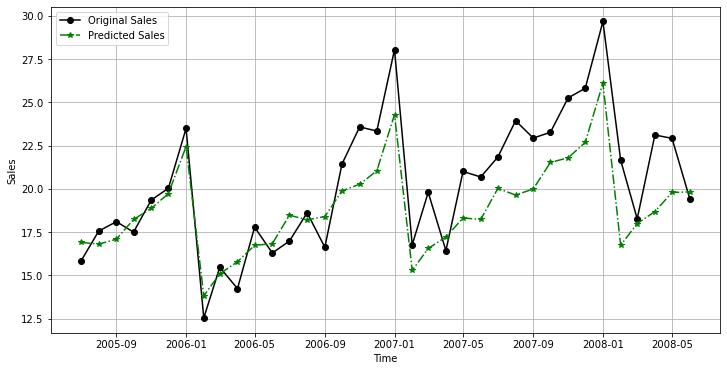

In [17]:
# PART 8B:
# Plot of predicted values overlaid on the original data
plt.figure(figsize=(12,6))
plt.plot(testset['Month'], testset['Sales'], label='Original Sales', c='black', linestyle='-', marker='o')
plt.plot(testset['Month'], testset['prediction'], label='Predicted Sales', c='green', linestyle='-.', marker='*')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 8C)

In [18]:
# PART 8C:
# Calculating the MSE between the original data and the predicted values
from sklearn.metrics import mean_squared_error

# Compute the MSE
mse = mean_squared_error(pharma_data['Sales'].iloc[168:], testset['prediction'])

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 5.462130003412936


From the table and the plot we can see that the predicted values are very close to the actual/original data points for the Sales column. The MSE value of 5.462130003412936 indicates that our model captures the underlying patterns and trends in the data fairly well. It is noteworthy that the discrepancies between the predicted values and actual values is quite common and our model does a decent job, further analysis might even reduce this MSE and we might be able to get better predictions.

# Problem 2

# A)

In [19]:
wine_data = pd.read_csv('TotalWine.csv')
wine_data

,Time (Quarter),TotalWine
0,1,1.486
1,2,1.915
2,3,1.844
3,4,2.808
4,5,1.287
5,6,1.861
6,7,2.034
7,8,2.739
8,9,1.656
9,10,1.918


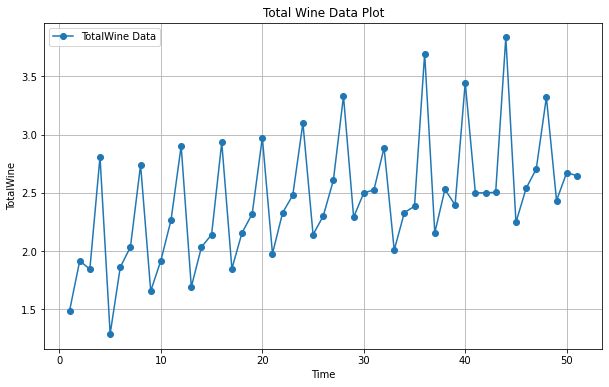

In [20]:
plt.figure(figsize=(10,6))
plt.plot(wine_data['Time (Quarter)'], wine_data['TotalWine'], label="TotalWine Data", marker='o')
plt.xlabel('Time')
plt.ylabel('TotalWine')
plt.title('Total Wine Data Plot')
plt.legend()
plt.grid(True)
plt.show()

The seasonal period of this time series seems to be every 4 quarters so one possible interpretation of this would be annual seasonality as there are 4 quarters in a fiscal year.

# B)

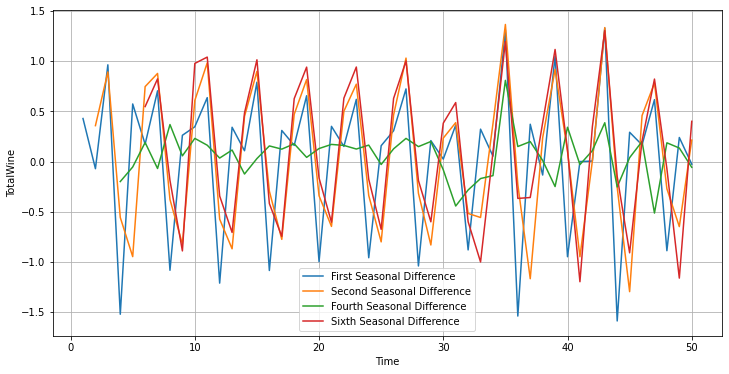

In [21]:
# Seasonal Differencing
seasonal_diff1 = wine_data['TotalWine'].diff(1)
seasonal_diff2 = wine_data['TotalWine'].diff(2)
seasonal_diff4 = wine_data['TotalWine'].diff(4)
seasonal_diff6 = wine_data['TotalWine'].diff(6)
# pos 0 for diff1 nan, pos 0 and 1 for diff2 nan, pos 0,1,2,3 for diff4 nan, pos 0,1,2,3,4,5 for diff6 nan

# Plots
plt.figure(figsize=(12,6))
plt.plot(seasonal_diff1, label='First Seasonal Difference')
plt.plot(seasonal_diff2, label='Second Seasonal Difference')
plt.plot(seasonal_diff4, label='Fourth Seasonal Difference')
plt.plot(seasonal_diff6, label='Sixth Seasonal Difference')
plt.xlabel('Time')
plt.ylabel('TotalWine')
plt.legend()
plt.grid(True)
plt.show()

From the above plot the fourth seasonal difference i.e. lag 4 seems to be the most suitable to remove the seasonality.

# C)

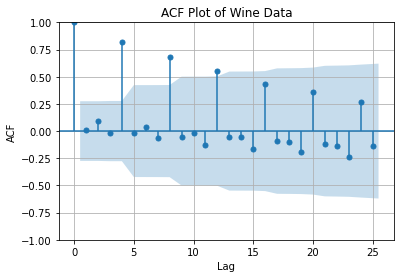

In [22]:
# Plotting ACF of the Original Time Series
plot_acf(wine_data['TotalWine'], lags=25)
plt.title('ACF Plot of Wine Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

From the above ACF plot of the wine data, the significant peaks seem to be at lag 4, lag 8, lag 12 and so on. Therefore, the seasonal period is every 4 quarters or in other words annual but in terms of quarters not months.

In [23]:
from statsmodels.tsa.ar_model import AutoReg

best_order = None
min_aic = float('inf')

# Iterate through different lag orders and calculate AIC
# NOTE: I am running the following search for best AR order on the fourth seasonal data
####### If it is run on the original time series the best AR order found by minimum AIC
####### value method comes out to be 8, however, here we find it to be 4.
for p in range(1, 11):
    model = sm.tsa.AutoReg(seasonal_diff4.dropna(), lags=p)
    results = model.fit()
    aic = results.aic
    print(f"AIC for order {p}: {aic}")
    if aic < min_aic:
        min_aic = aic
        best_order = p

# Printing the optimal AR order and its corresponding AIC
print("Minimum AIC:", min_aic)
print("Optimal AR Order (p) based on Minimum AIC:", best_order)

AIC for order 1: -3.2585296001103874
AIC for order 2: -0.43612691994517405
AIC for order 3: 2.2955947939000376
AIC for order 4: -18.571190665860307
AIC for order 5: -16.137237852006194
AIC for order 6: -13.649083439021595
AIC for order 7: -14.197955461006565
AIC for order 8: -11.229617621206952
AIC for order 9: -8.072504350825529
AIC for order 10: -5.124304330227638
Minimum AIC: -18.571190665860307
Optimal AR Order (p) based on Minimum AIC: 4


# E 
# i)

In [24]:
ar_model = ARIMA(seasonal_diff4.dropna(),order=(4,0,0)) 
model_fit = ar_model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              TotalWine   No. Observations:                   47
Model:                 ARIMA(4, 0, 0)   Log Likelihood                  16.370
Date:                Mon, 30 Oct 2023   AIC                            -20.739
Time:                        18:48:53   BIC                             -9.638
Sample:                             0   HQIC                           -16.562
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0725      0.018      4.034      0.000       0.037       0.108
ar.L1         -0.0072      0.112     -0.064      0.949      -0.227       0.213
ar.L2          0.0470      0.167      0.282      0.778      -0.280       0.374
ar.L3          0.0600      0.097      0.618      0.537      -0.130       0.250
ar.L4         -0.6652      0.120     -5.546      0.000      -0.900      -0.430
sigma2         0.0277      0.007      4.119      0.000       0.015       0.041
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.51   Prob(JB):                         0.80
Heteroskedasticity (H):               3.07   Skew:                            -0.18
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ii)

In [25]:
preds = model_fit.predict()

# Taking a look at the prediction values starting from the optimal lag
preds

4     0.072507
5     0.095271
6     0.077843
7     0.027467
8     0.252057
9     0.154932
10   -0.000086
11    0.182566
12   -0.118841
13    0.096858
14   -0.029558
15    0.013466
16    0.091069
17    0.029851
18    0.204228
19    0.107467
20    0.025191
21    0.042679
22    0.003167
23    0.100249
24    0.043960
25    0.014115
26    0.021822
27    0.037916
28    0.006983
29    0.150205
30    0.048456
31   -0.021228
32    0.025701
33   -0.043271
34    0.129355
35    0.384244
36    0.279226
37    0.254483
38    0.260804
39   -0.406360
40    0.027960
41   -0.032376
42    0.107534
43    0.297461
44   -0.113444
45    0.160005
46    0.052038
47   -0.158714
48    0.297208
49    0.074091
50   -0.042502
Name: predicted_mean, dtype: float64

# iii)

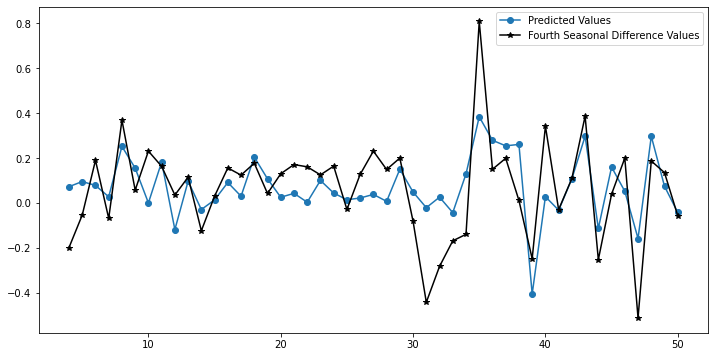

In [26]:
plt.figure(figsize=(12,6)) 
plt.plot(preds,label = 'Predicted Values', marker='o') 
plt.plot(seasonal_diff4,label = 'Fourth Seasonal Difference Values', c='black', marker='*') 
plt.legend()
plt.show()

# iv)

In [27]:
# Calculating the Mean Absolute Error (MAE) by comparing predicted results with the seasonally differenced data
mae = np.mean(np.abs(preds - seasonal_diff4)) 
print('The Mean Absolute Error (MAE) is', mae)

The Mean Absolute Error (MAE) is 0.13461884335362367
